In [1]:
import numpy as np
import pandas as pd
from data_prepare import load_data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train, X_test, y_train, y_test = load_data('train_transaction.csv','train_identity.csv')

               isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400            68.5         W  13926    NaN   
2987001              0          86401            29.0         W   2755  404.0   
2987002              0          86469            59.0         W   4663  490.0   
2987003              0          86499            50.0         W  18132  567.0   
2987004              0          86506            50.0         H   4497  514.0   

               card3       card4  card5   card6  ...                id_31  \
TransactionID                                    ...                        
2987000        150.0    discover  142.0  credit  ...                  NaN   
2987001        150.0  mastercard  102.0  credit  ...                  NaN   
2987002        150.0        visa  166.0   debit  ...                  NaN   
2987003        150.0  mastercard  117.0   debit

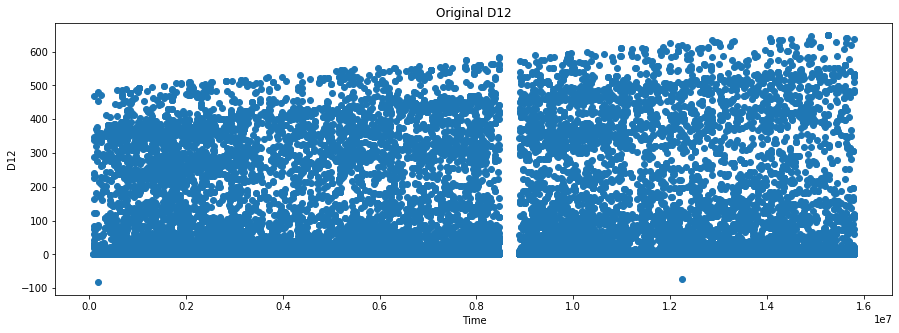

In [27]:
plt.figure(figsize=(15,5))
plt.scatter(X_train.TransactionDT,X_train.D12)
plt.title('Original D12')
plt.xlabel('Time')
plt.ylabel('D12')
plt.show()

In [42]:
for i in range(1,16):
    if i in [1,2,3,5,9]: continue
    X_train['D'+str(i)] =  X_train['D'+str(i)] - X_train.TransactionDT/np.float32(24*60*60)
    X_test['D'+str(i)] = X_test['D'+str(i)] - X_test.TransactionDT/np.float32(24*60*60) 

/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/sizhenhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


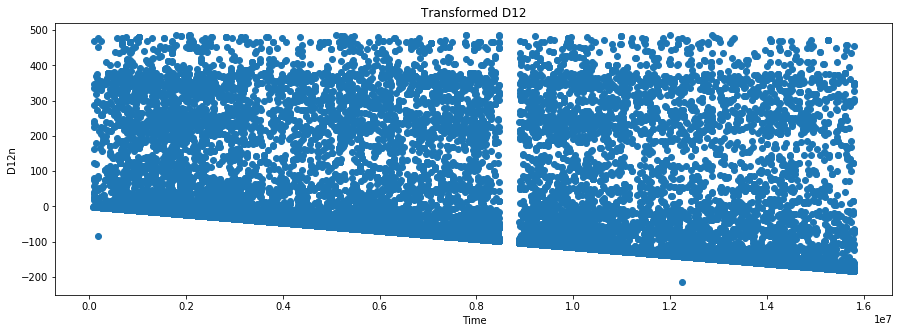

In [44]:
# PLOT TRANSFORMED D
plt.figure(figsize=(15,5))
plt.scatter(X_train.TransactionDT,X_train.D12)
plt.title('Transformed D12')
plt.xlabel('Time')
plt.ylabel('D12n')
plt.show()

In [3]:
nans_df = X_train.isna()
nans_groups={}

In [4]:
v_cols = ['V'+str(i) for i in range(1,340)]
for col in X_train.columns:
    cur_group = nans_df[col].sum()
    try:
        nans_groups[cur_group].append(col)
    except:
        nans_groups[cur_group]=[col]
for k,v in nans_groups.items():
    print('####### NAN count =',k)
    print(v)

####### NAN count = 0
['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
####### NAN count = 6648
['card2']
####### NAN count = 1160
['card3']
####### NAN count = 1171
['card4']
####### NAN count = 3181
['card5']
####### NAN count = 1166
['card6']
####### NAN count = 49239
['addr1', 'addr2']
####### NAN count = 264172
['dist1']
####### NAN count = 414709
['dist2']
####### NAN count = 70786
['P_emaildomain']
####### NAN count = 340070
['R_emaildomain']
####### NAN count = 956
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
####### NAN count = 210446
['D2']
####### NAN count = 196987
['D3']
####### NAN count = 126724
['D4']
####### NAN count = 232264
['D5']
####### NAN count = 388155
['D6']
####### NAN count = 413842
['D7']
####### NAN count = 386785
['D8', 'D9', 'id_09', 'id_10']
####### NAN count = 56984
['D10']
####### NAN count = 209456
['D11'

In [5]:
def make_plots(Vs):
    col = 4
    row = len(Vs)//4+1
    plt.figure(figsize=(20,row*5))
    idx = X_train[~X_train[Vs[0]].isna()].index
    for i,v in enumerate(Vs):
        plt.subplot(row,col,i+1)
        n = X_train[v].nunique()
        x = np.sum(X_train.loc[idx,v]!=X_train.loc[idx,v].astype(int))
        y = np.round(100*np.sum(X_train[v].isna())/len(X_train),2)
        t = 'int'
        if x!=0: t = 'float'
        plt.title(v+' has '+str(n)+' '+t+' and '+str(y)+'% nan')
        plt.yticks([])
        h = plt.hist(X_train.loc[idx,v],bins=100)
        if len(h[0])>1: plt.ylim((0,np.sort(h[0])[-2]))
    plt.show()

def make_corr(Vs,Vtitle=''):
    cols = ['TransactionDT'] + Vs
    plt.figure(figsize=(15,15))
    sns.heatmap(X_train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
    if Vtitle!='': plt.title(Vtitle,fontsize=14)
    else: plt.title(Vs[0]+' - '+Vs[-1],fontsize=14)
    plt.show()
    
def reduce_group(grps,c='V'):
    use = []
    not_use = []
    for g in grps:
        mx = 0; vx = g[0]
        for gg in g:
            n = X_train[c+str(gg)].nunique()
            if n>mx:
                mx = n
                vx = gg
        use.append(vx)
        for gg in g:
            if gg != vx:
                not_use.append(gg)
    print('Use these',use)
    return not_use
remove_v = []

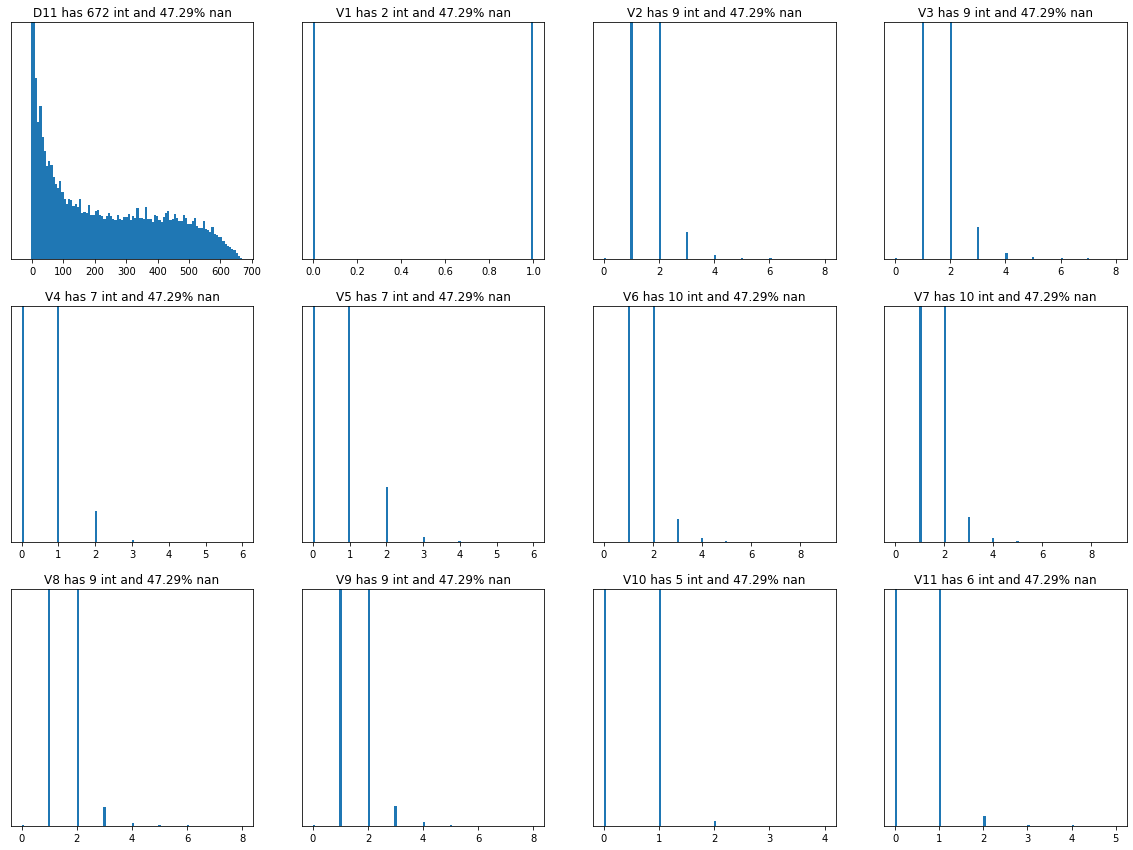

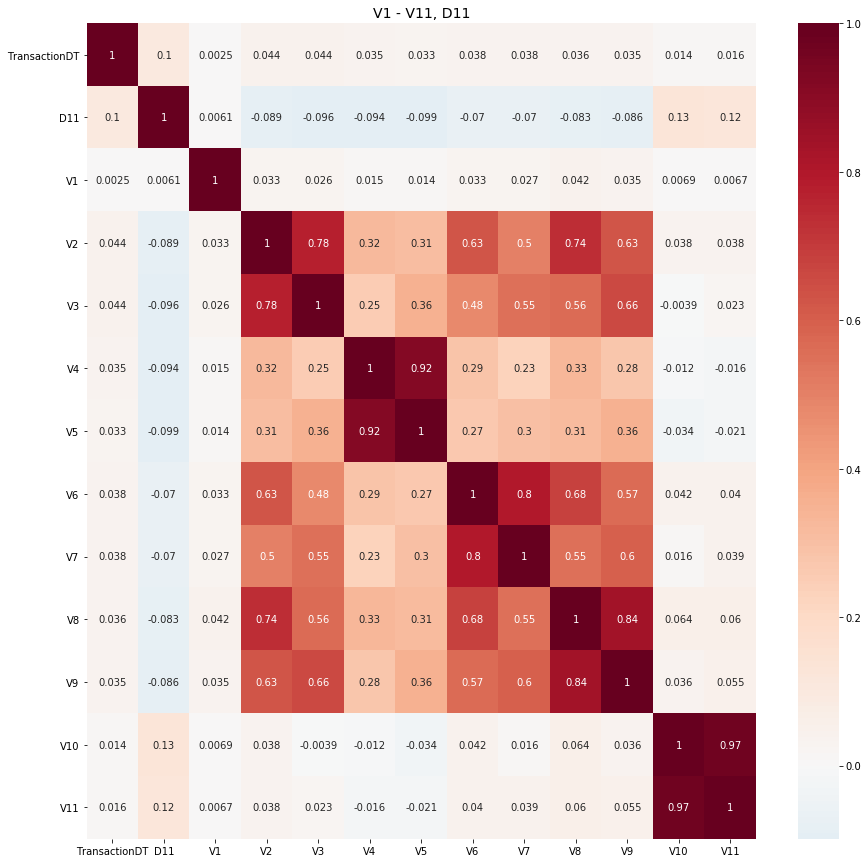

In [6]:
Vs = nans_groups[209456]
Vtitle = 'V1 - V11, D11'
make_plots(Vs)
make_corr(Vs,Vtitle)

In [7]:
nans_groups

{0: ['TransactionDT',
  'TransactionAmt',
  'ProductCD',
  'card1',
  'C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14'],
 6648: ['card2'],
 1160: ['card3'],
 1171: ['card4'],
 3181: ['card5'],
 1166: ['card6'],
 49239: ['addr1', 'addr2'],
 264172: ['dist1'],
 414709: ['dist2'],
 70786: ['P_emaildomain'],
 340070: ['R_emaildomain'],
 956: ['D1',
  'V281',
  'V282',
  'V283',
  'V288',
  'V289',
  'V296',
  'V300',
  'V301',
  'V313',
  'V314',
  'V315'],
 210446: ['D2'],
 196987: ['D3'],
 126724: ['D4'],
 232264: ['D5'],
 388155: ['D6'],
 413842: ['D7'],
 386785: ['D8', 'D9', 'id_09', 'id_10'],
 56984: ['D10'],
 209456: ['D11',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11'],
 394432: ['D12'],
 396399: ['D13'],
 396247: ['D14'],
 66896: ['D15'],
 203319: ['M1', 'M2', 'M3'],
 211053: ['M4'],
 262764: ['M5'],
 126933: ['M6'],
 259687: ['M7'],
 259676: ['M8', 'M9'],
 57022: ['V12',
  

In [8]:
grps = [[1],[2,3],[4,5],[6,7],[8,9],[10,11]]
v1 = reduce_group(grps)
remove_v.extend(v1)

Use these [1, 2, 4, 6, 8, 11]


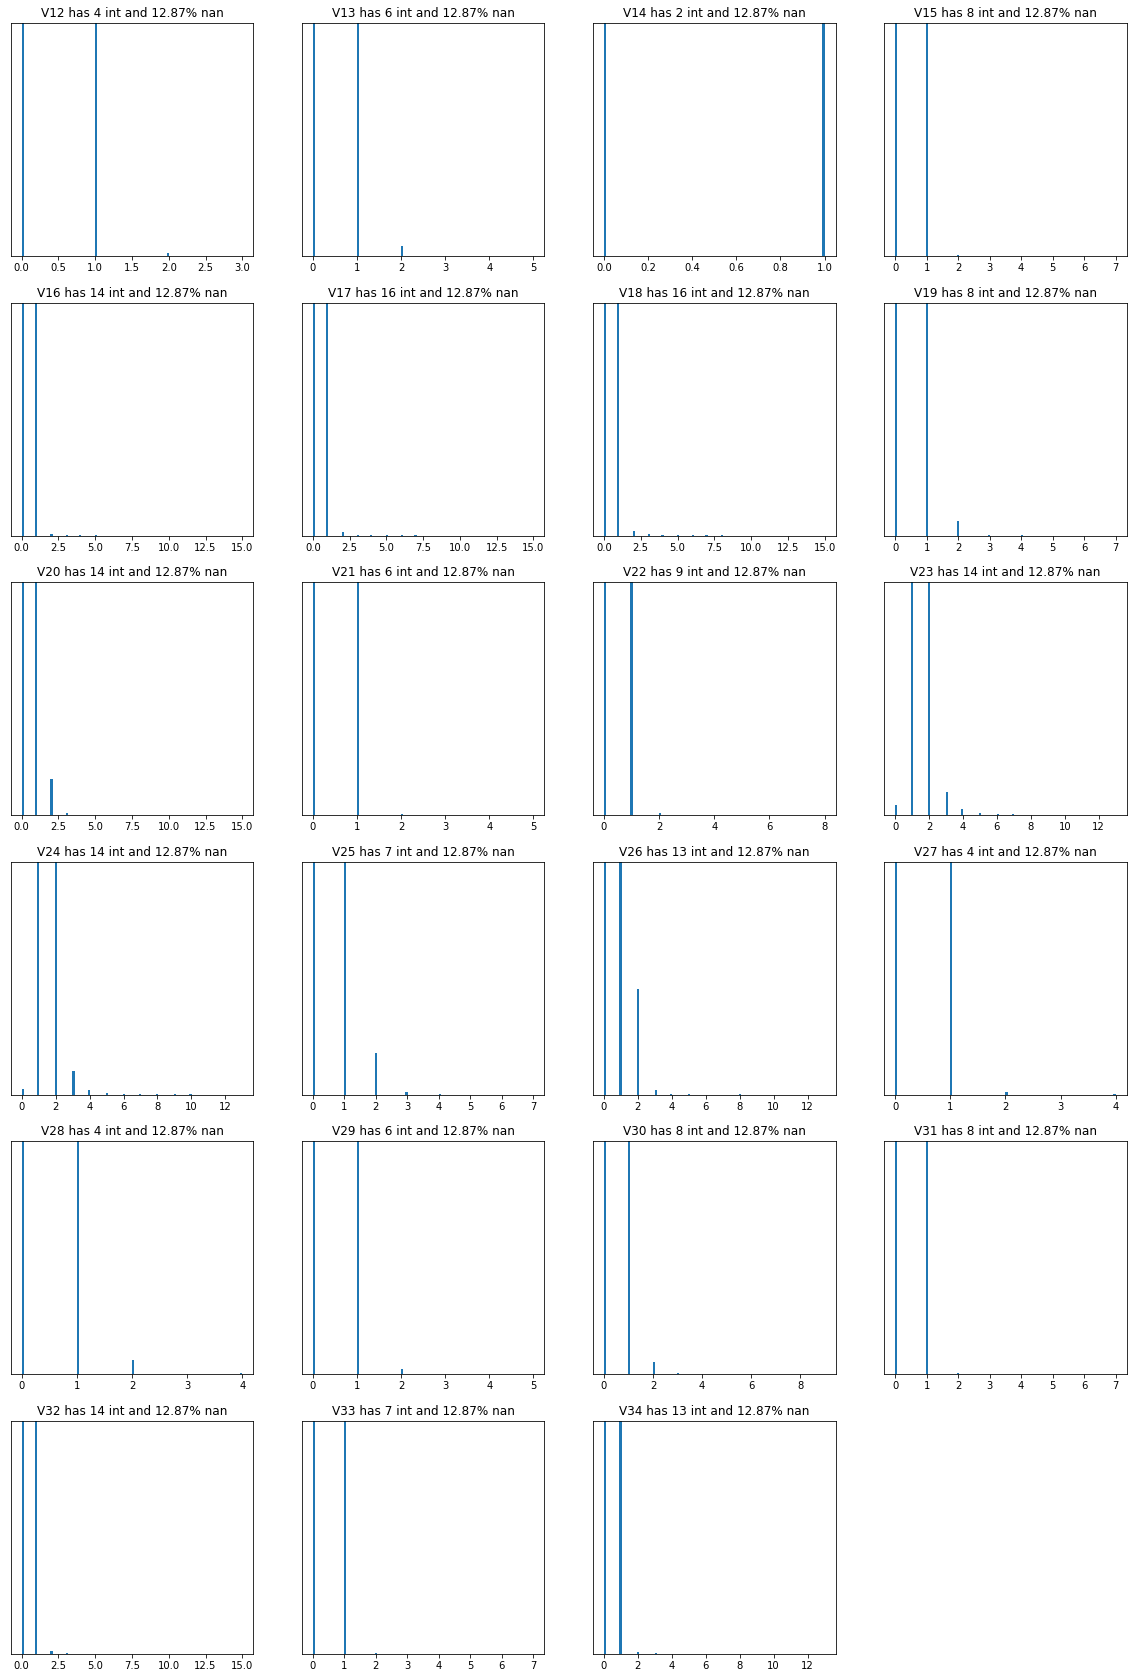

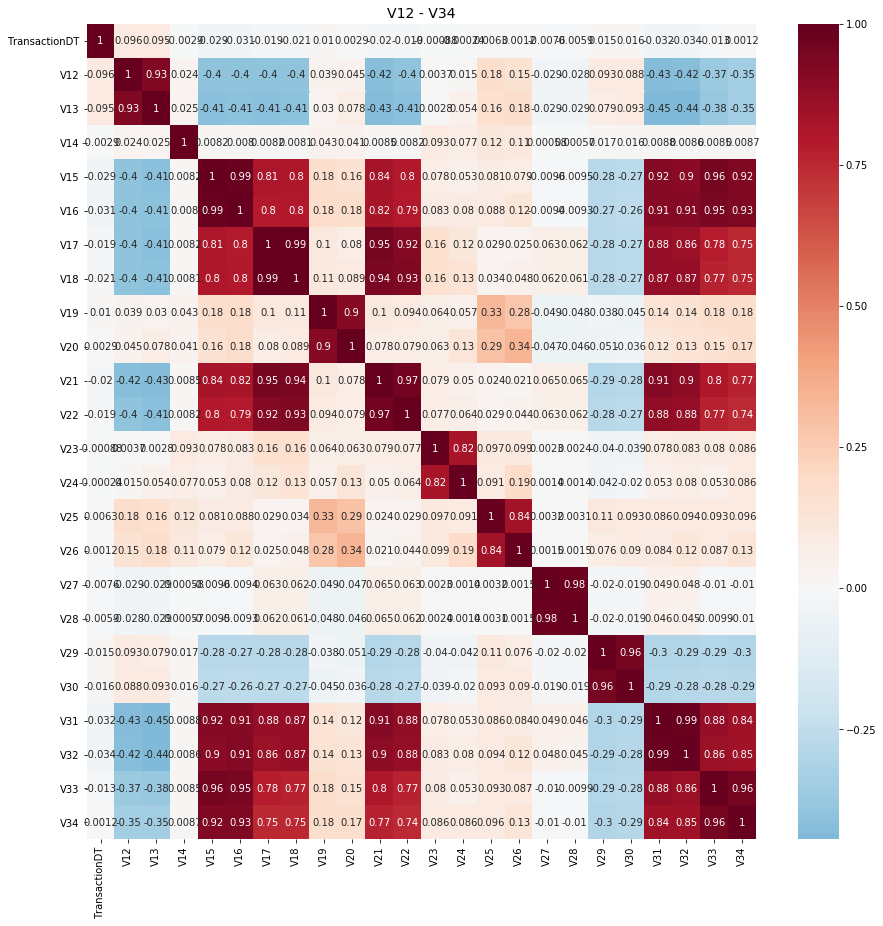

In [9]:
Vs = nans_groups[57022]
make_plots(Vs)
make_corr(Vs)

In [10]:
grps = [[12,13],[14],[15,16,17,18,21,22,31,32,33,34],[19,20],[23,24],[25,26],[27,28],[29,30]]
v2 = reduce_group(grps)
remove_v.extend(v2)

Use these [13, 14, 17, 20, 23, 26, 27, 30]


In [11]:
remove_v

[3, 5, 7, 9, 10, 12, 15, 16, 18, 21, 22, 31, 32, 33, 34, 19, 24, 25, 28, 29]

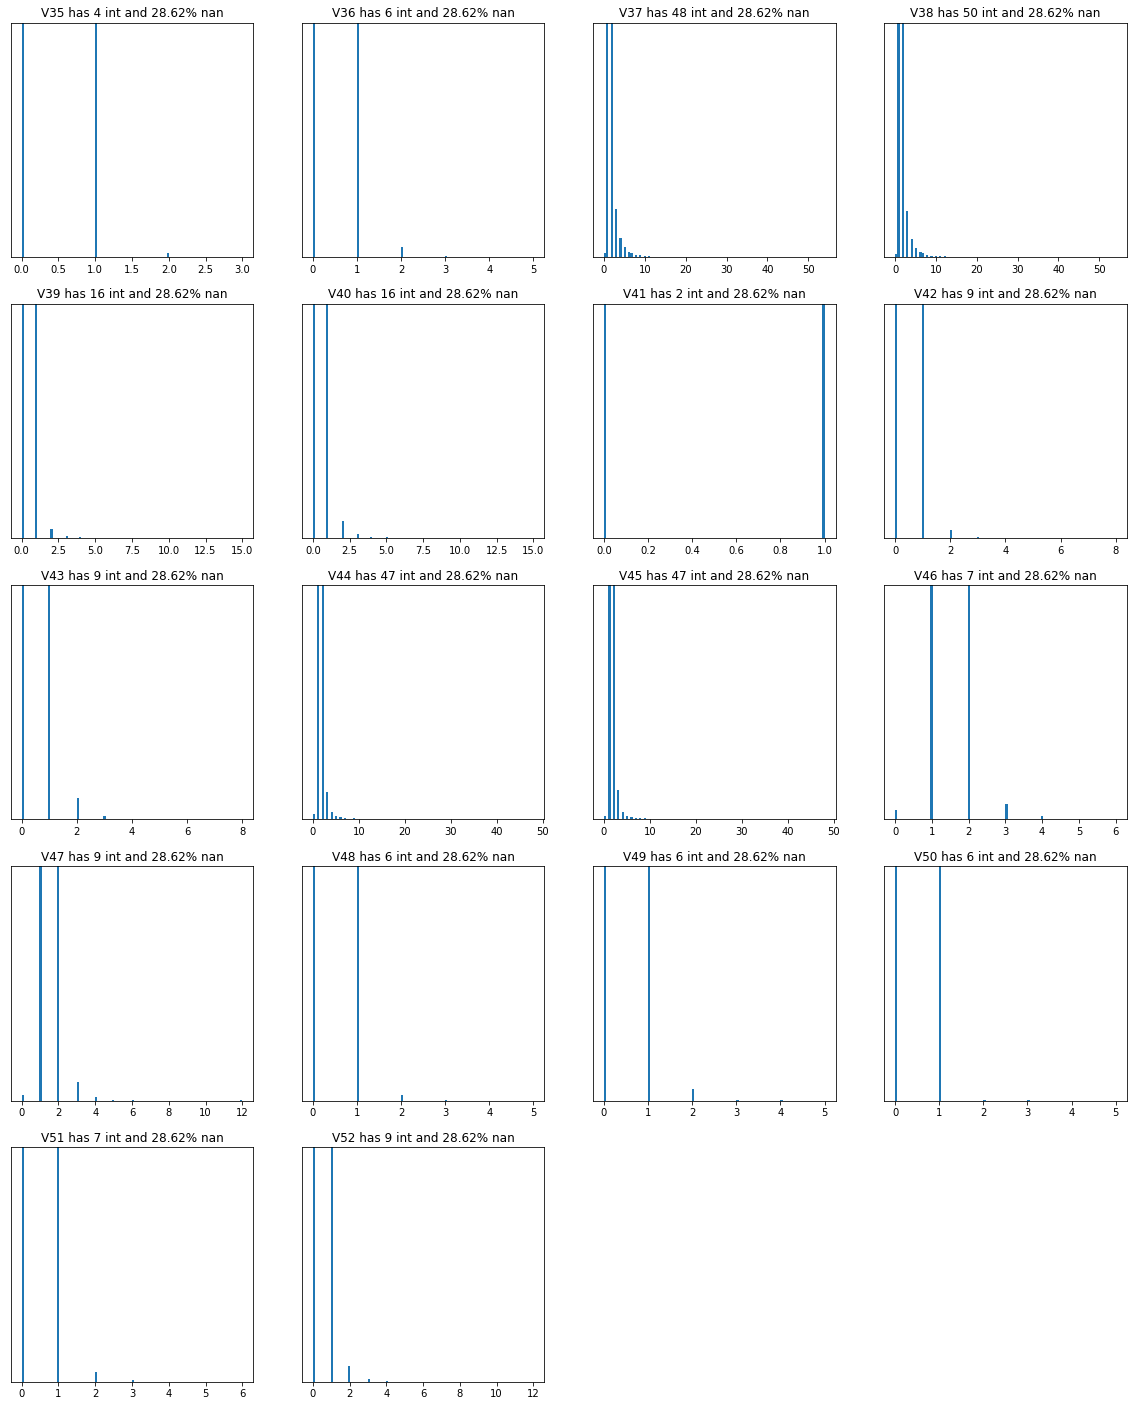

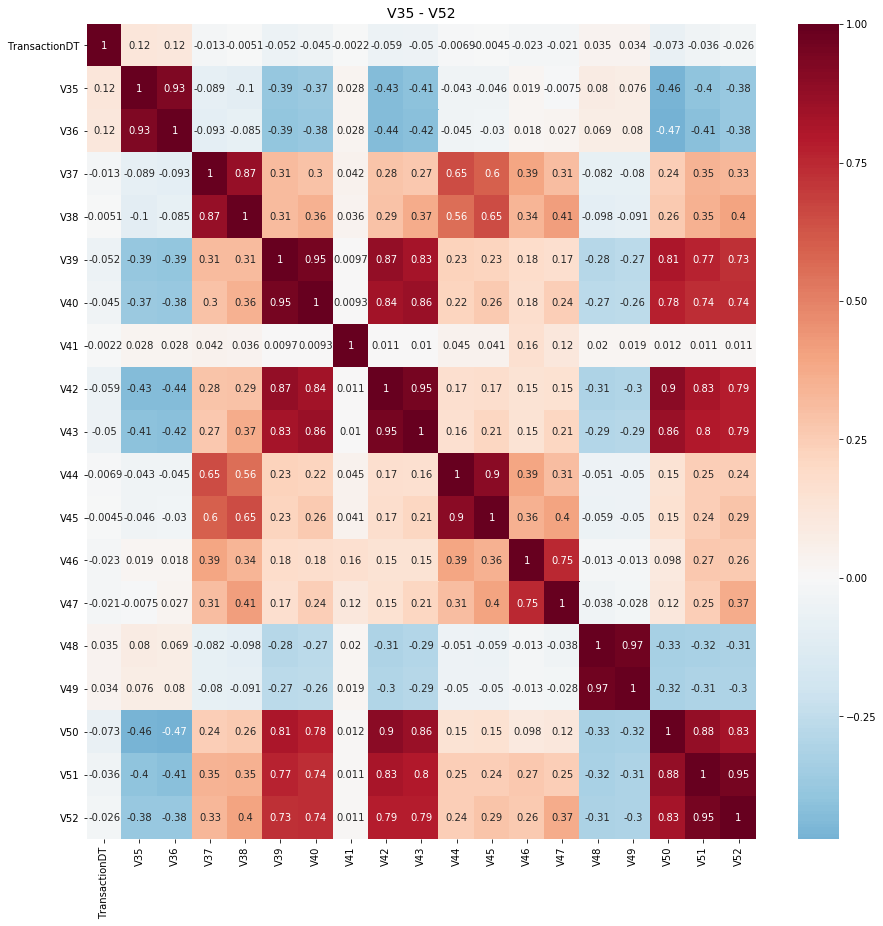

In [12]:
Vs = nans_groups[126762]
make_plots(Vs)
make_corr(Vs)

In [13]:
grps = [[35,36],[37,38],[39,40,42,43,50,51,52],[41],[44,45],[46,47],[48,49]]
v3 = reduce_group(grps)
remove_v.extend(v3)

Use these [36, 38, 39, 41, 44, 47, 48]


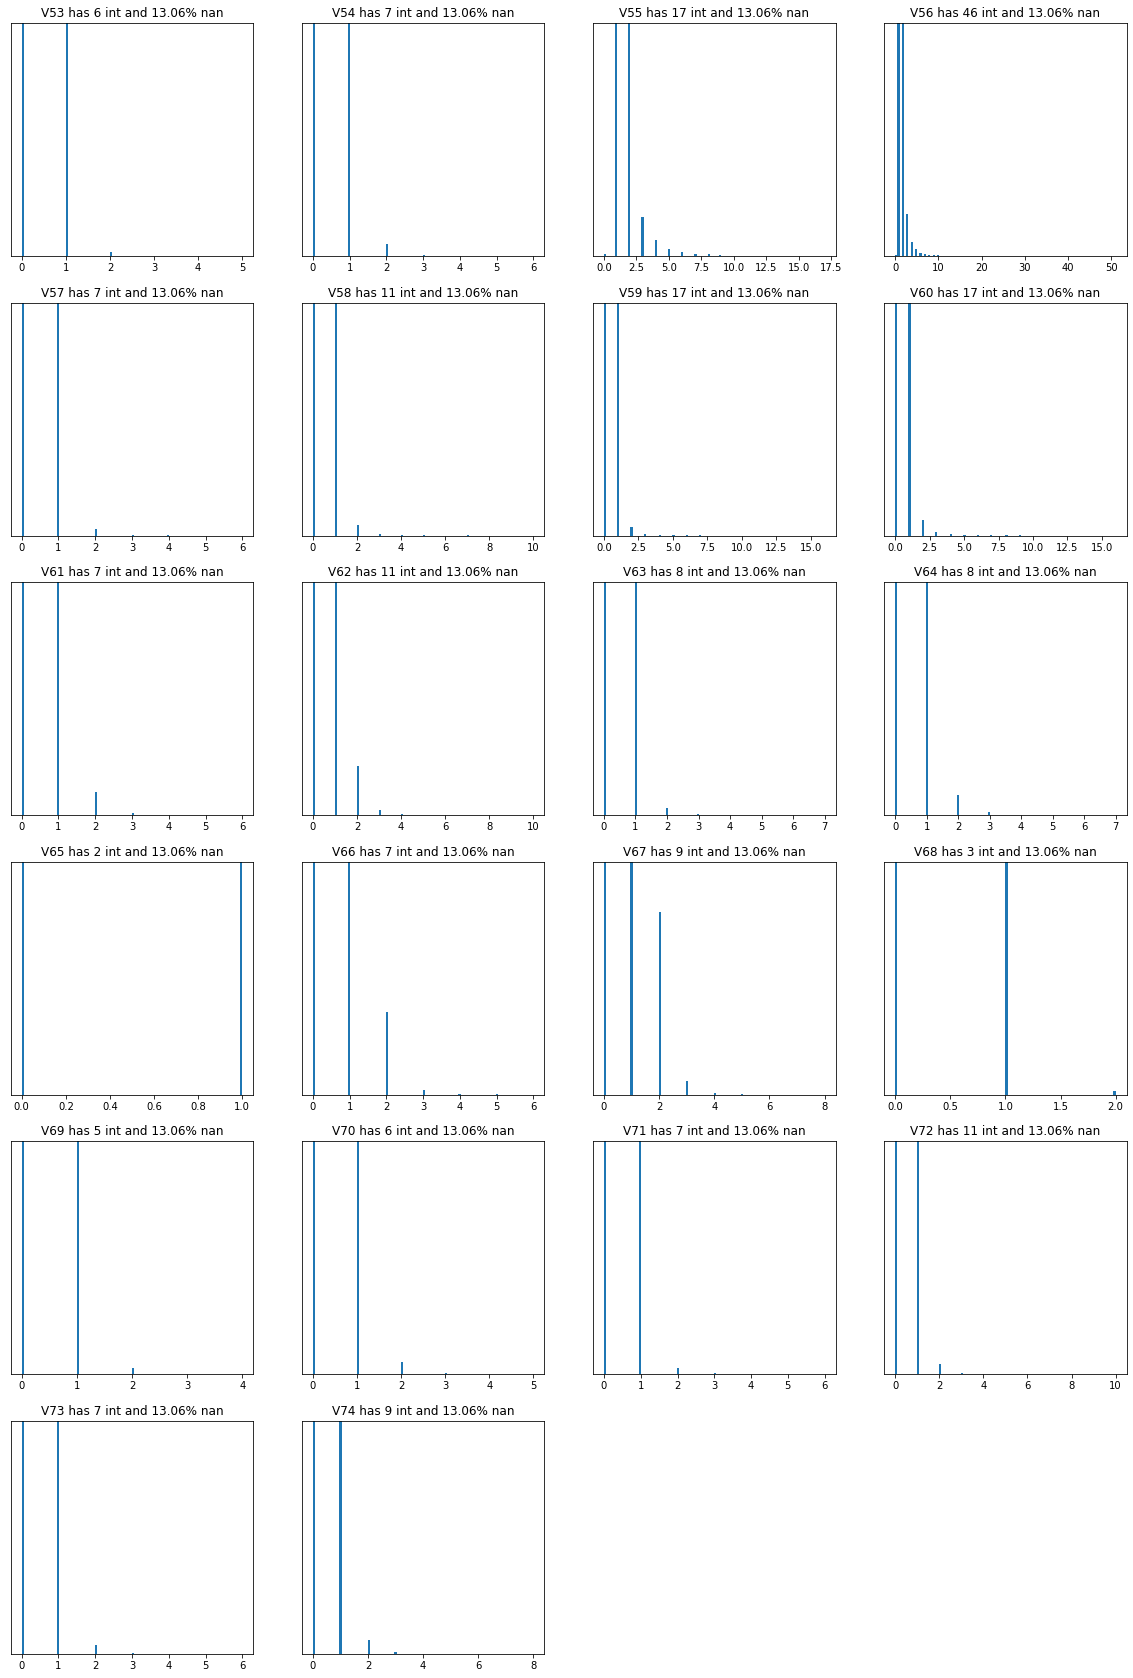

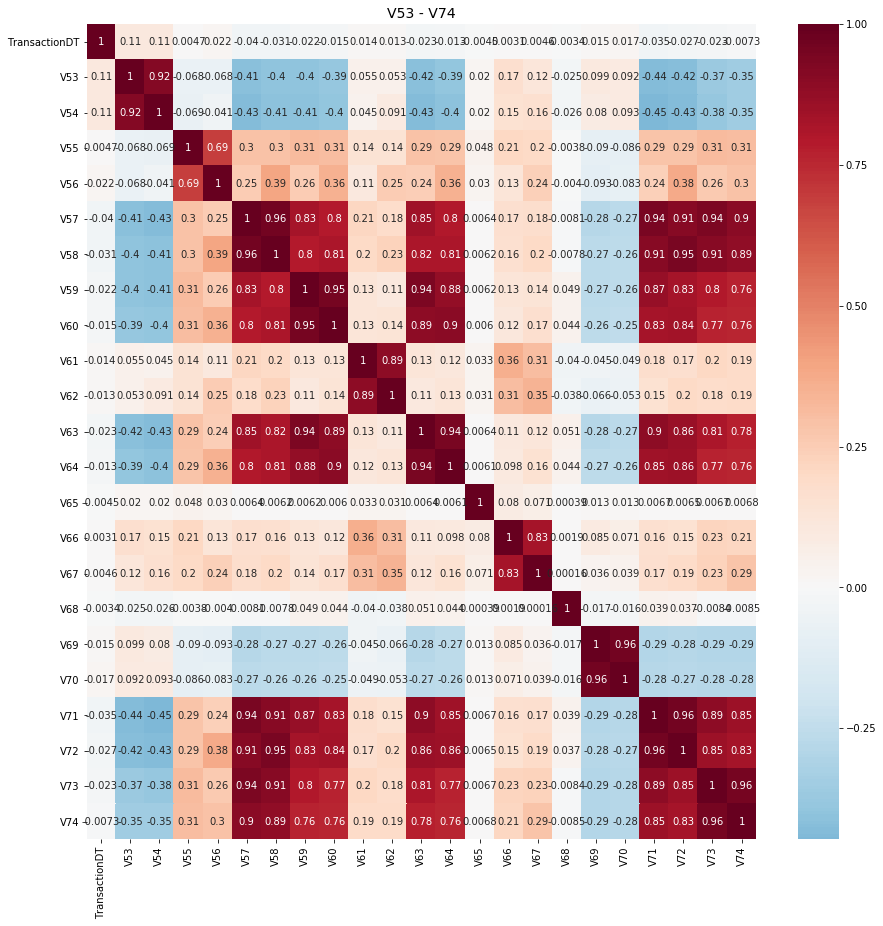

In [14]:
Vs = nans_groups[57850]
make_plots(Vs)
make_corr(Vs)

In [15]:
grps = [[53,54],[55,56],[57,58,59,60,63,64,71,72,73,74],[61,62],[65],[66,67],[68],[69,70]]
v4 = reduce_group(grps)
remove_v.extend(v4)

Use these [54, 56, 59, 62, 65, 67, 68, 70]


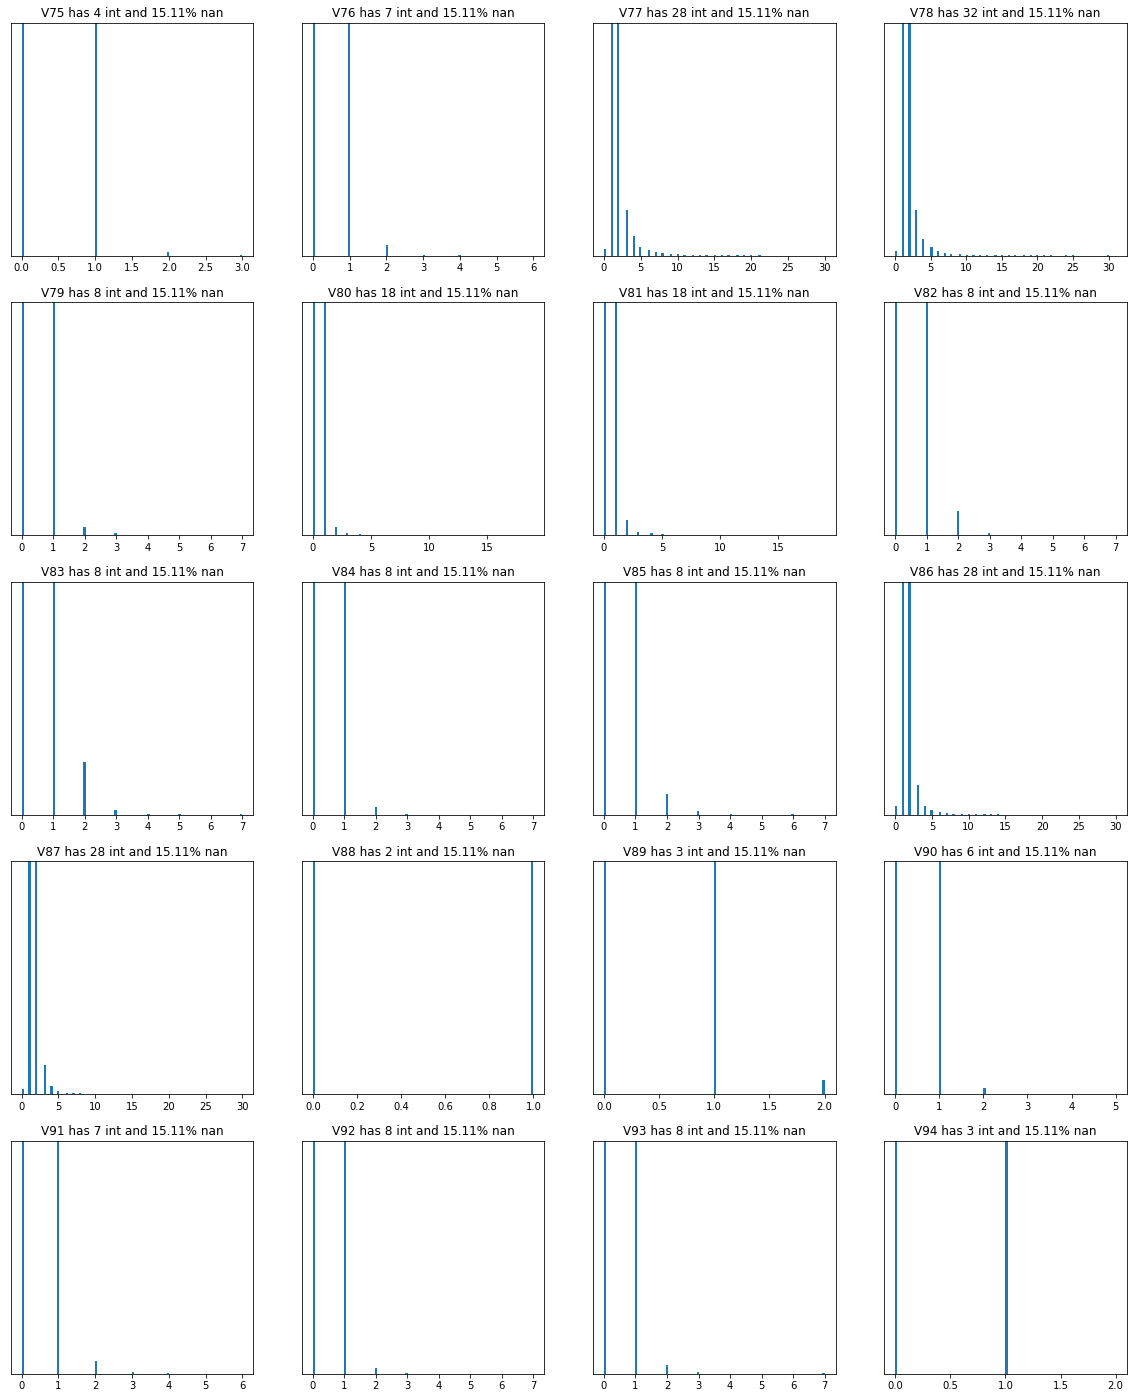

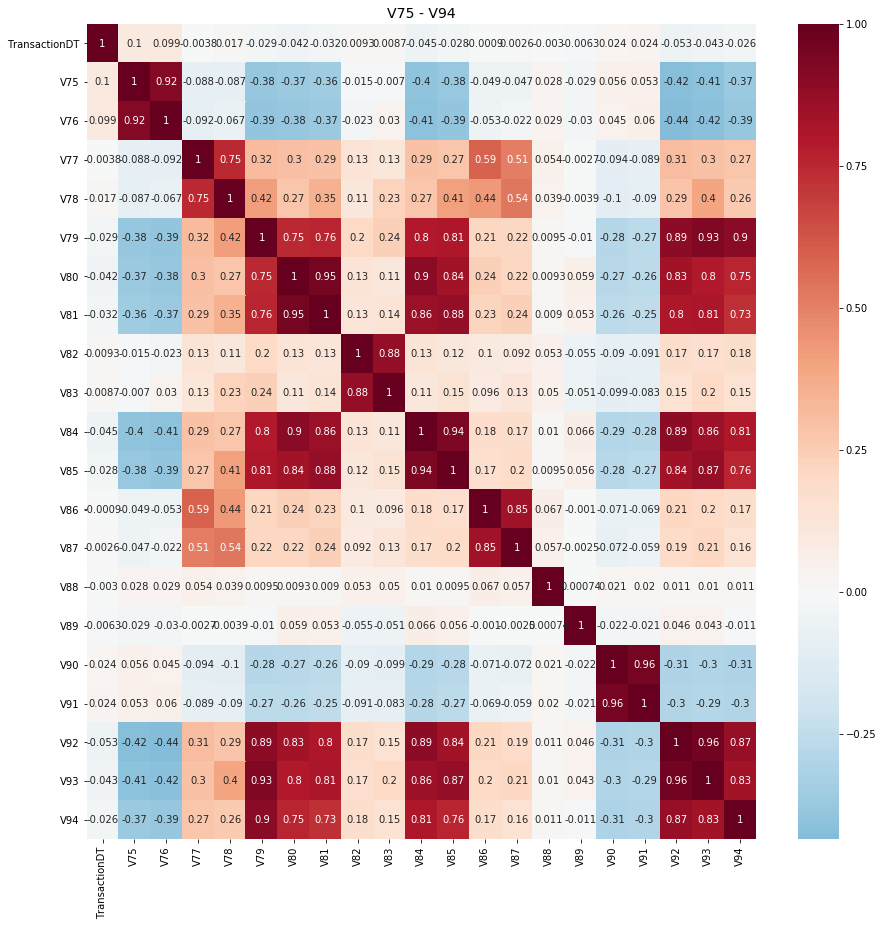

In [16]:
Vs = nans_groups[66934]
make_plots(Vs)
make_corr(Vs)

In [17]:
grps = [[75,76],[77,78],[79,80,81,84,85,92,93,94],[82,83],[86,87],[88],[89],[90,91]]


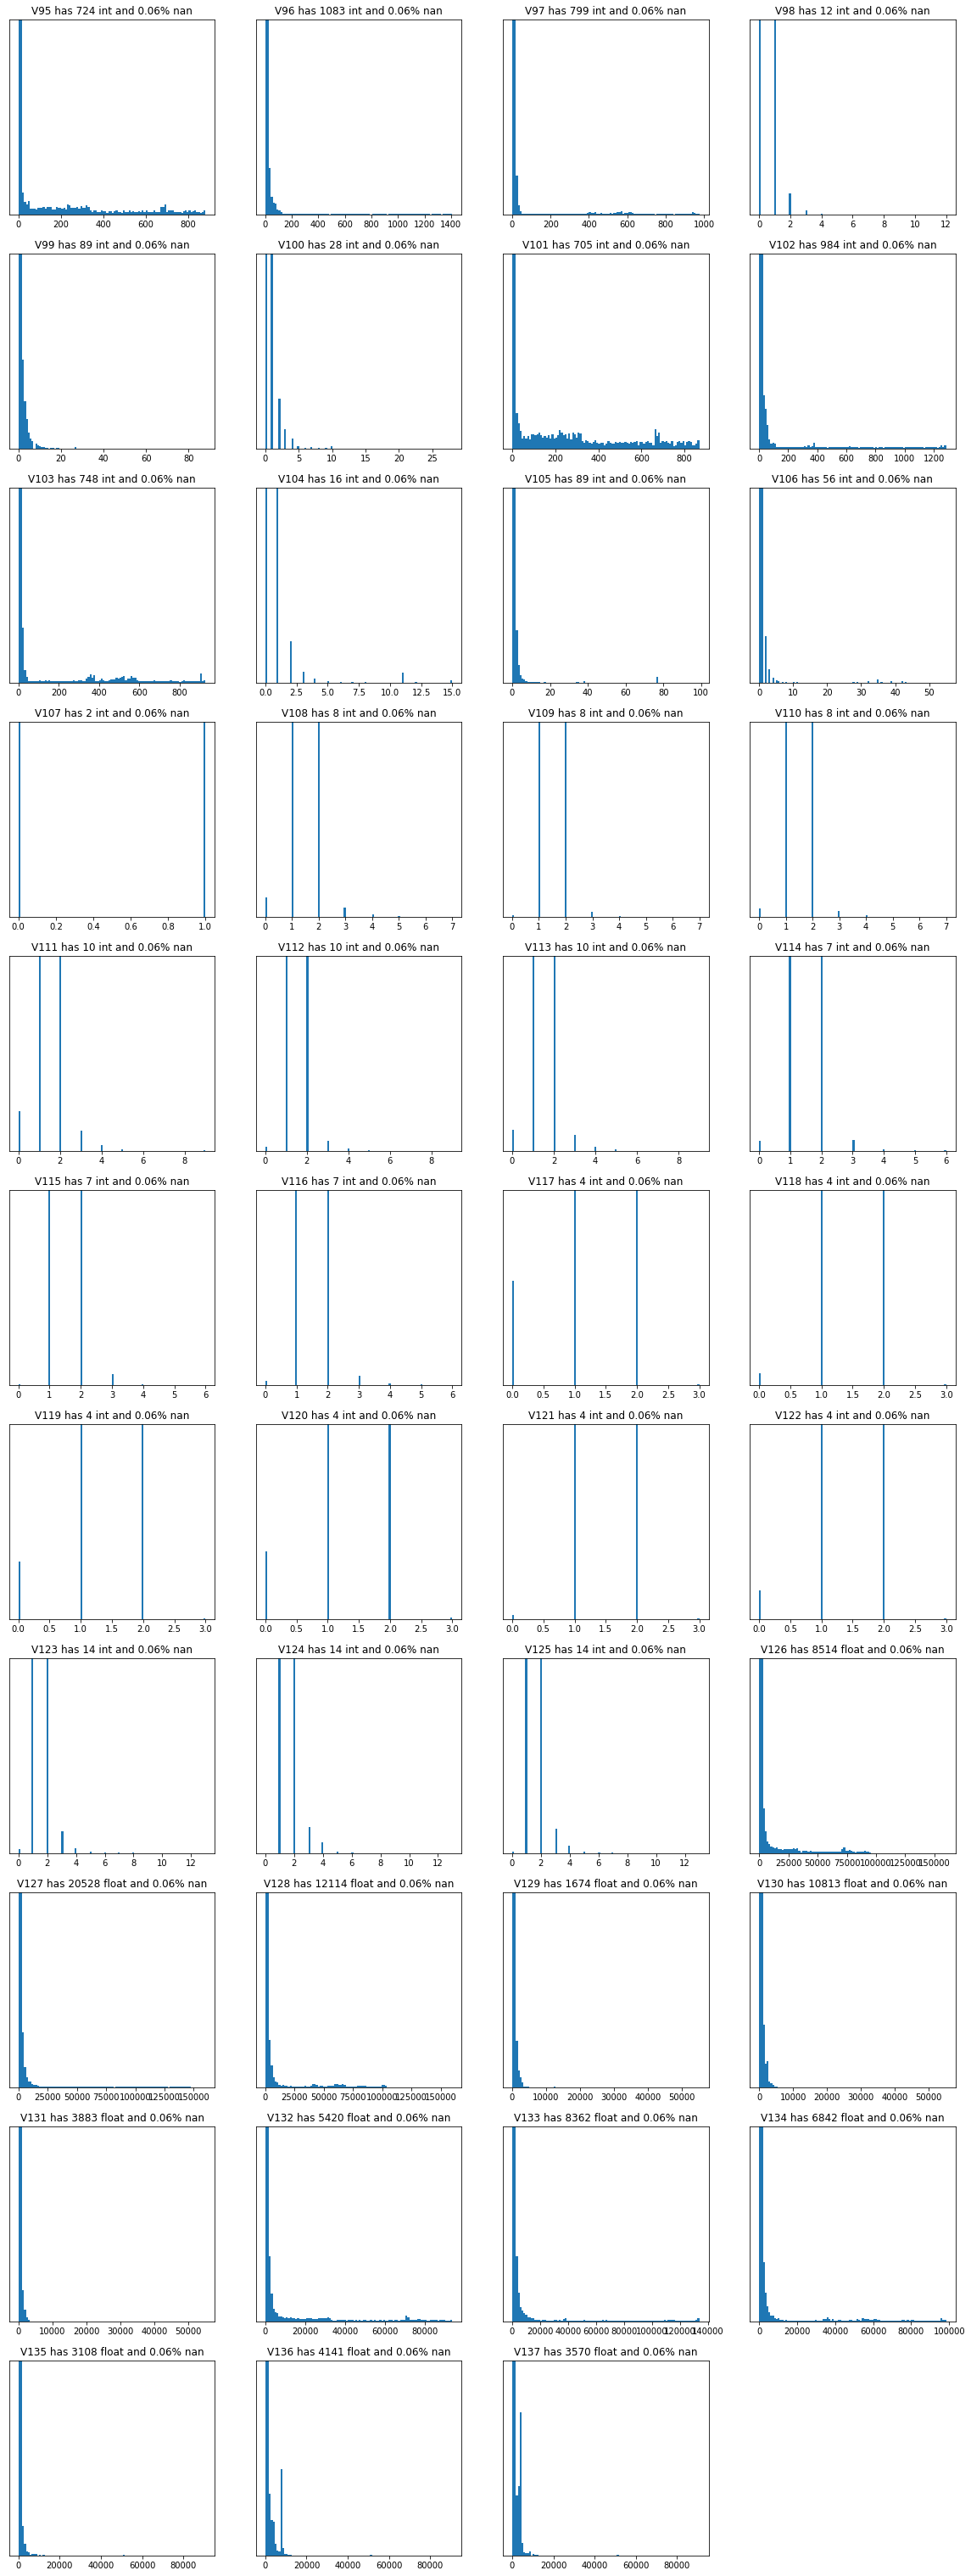

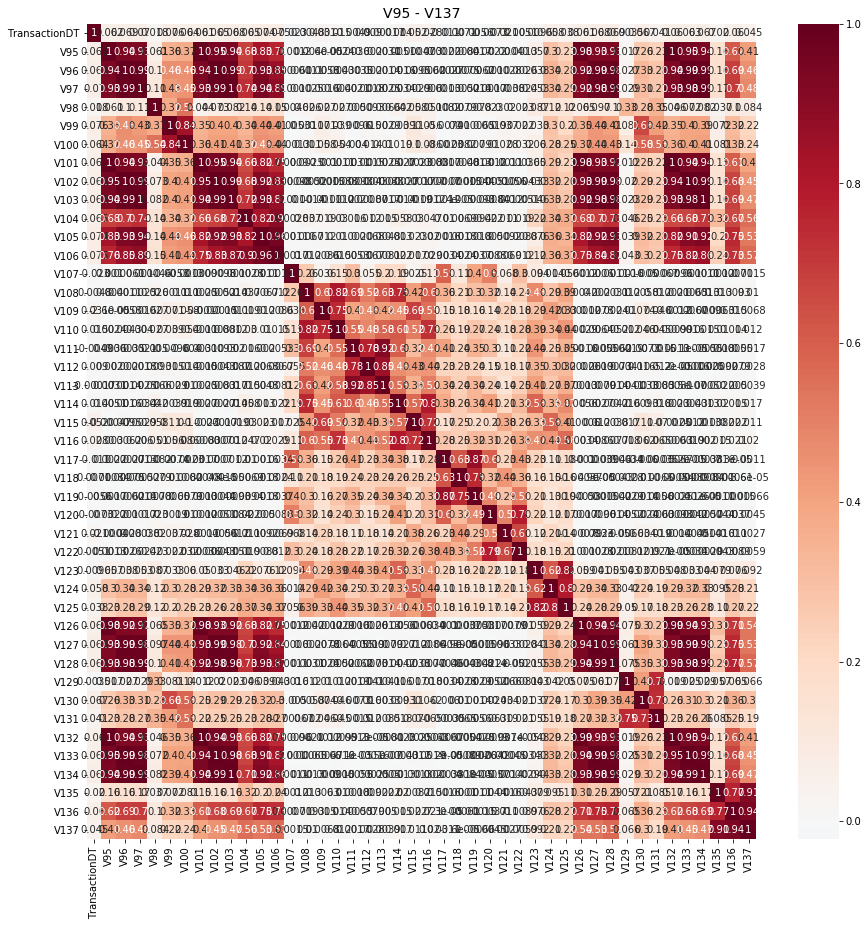

In [18]:
Vs = nans_groups[244]
make_plots(Vs)
make_corr(Vs)

In [19]:
grps = [[95,96,97,101,102,103,105,106],[98],[99,100],[104],[107],[108,109,110,114],[111,112,113],[115,116],[117,118,119],[120,122],[121],[123],[124,125],[126,127,128,132,133,134],[129],[130,131],[135,136,137]]
v6 = reduce_group(grps)
remove_v.extend(v6)


Use these [96, 98, 99, 104, 107, 108, 111, 115, 117, 120, 121, 123, 124, 127, 129, 130, 136]


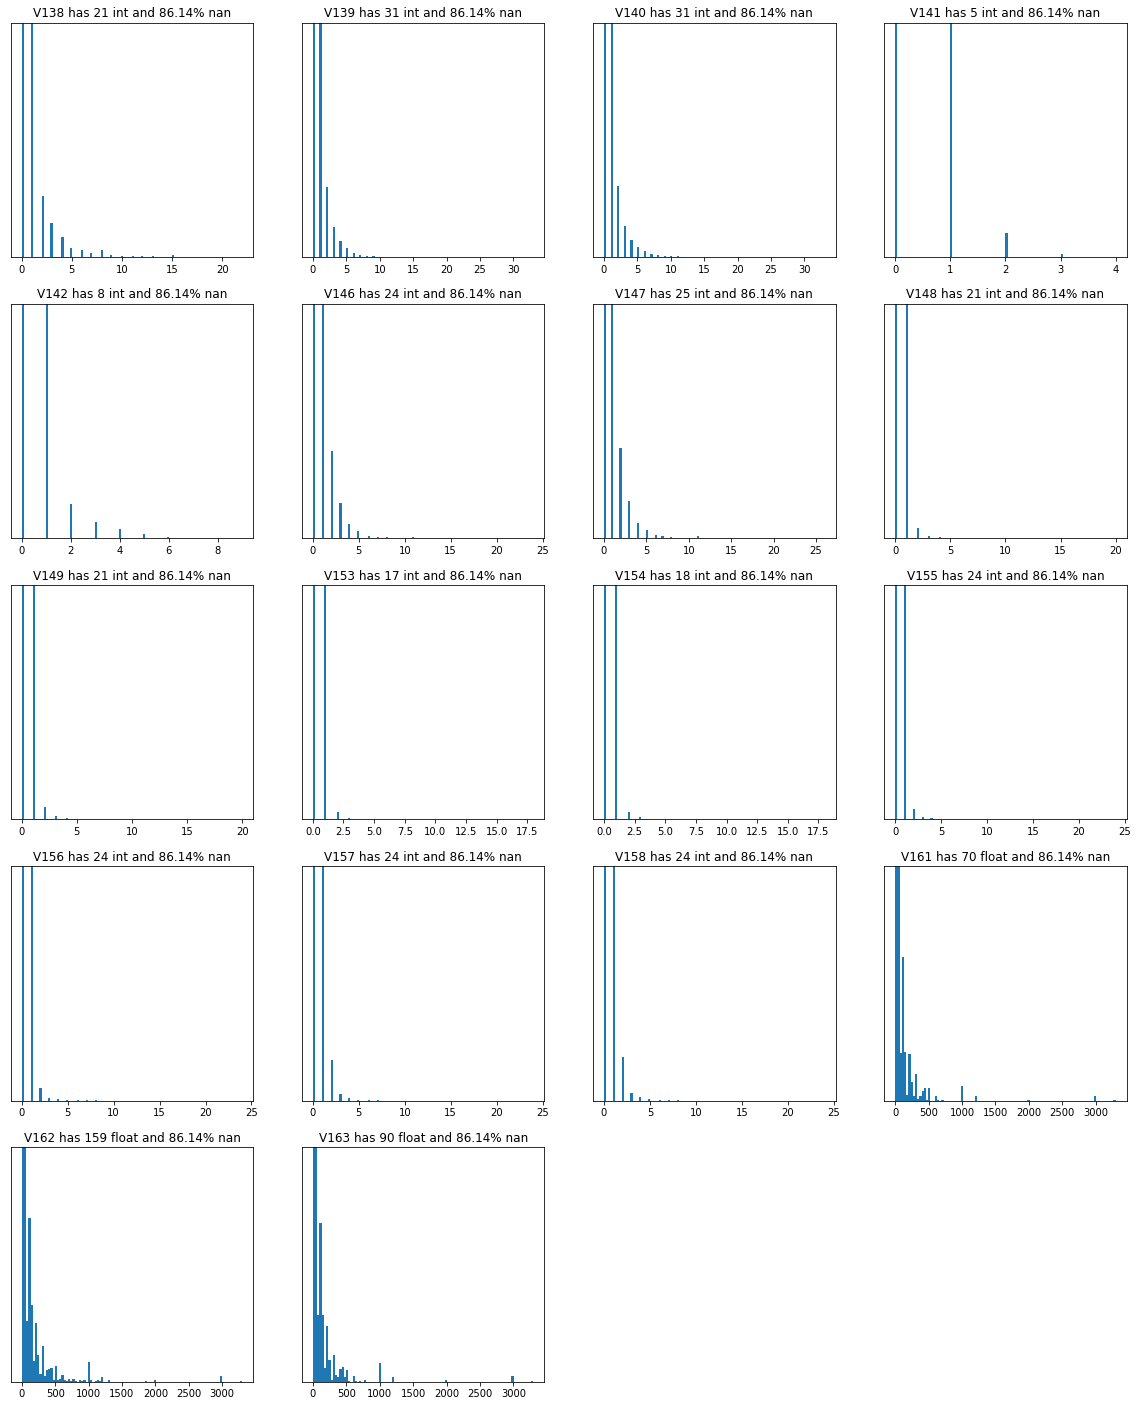

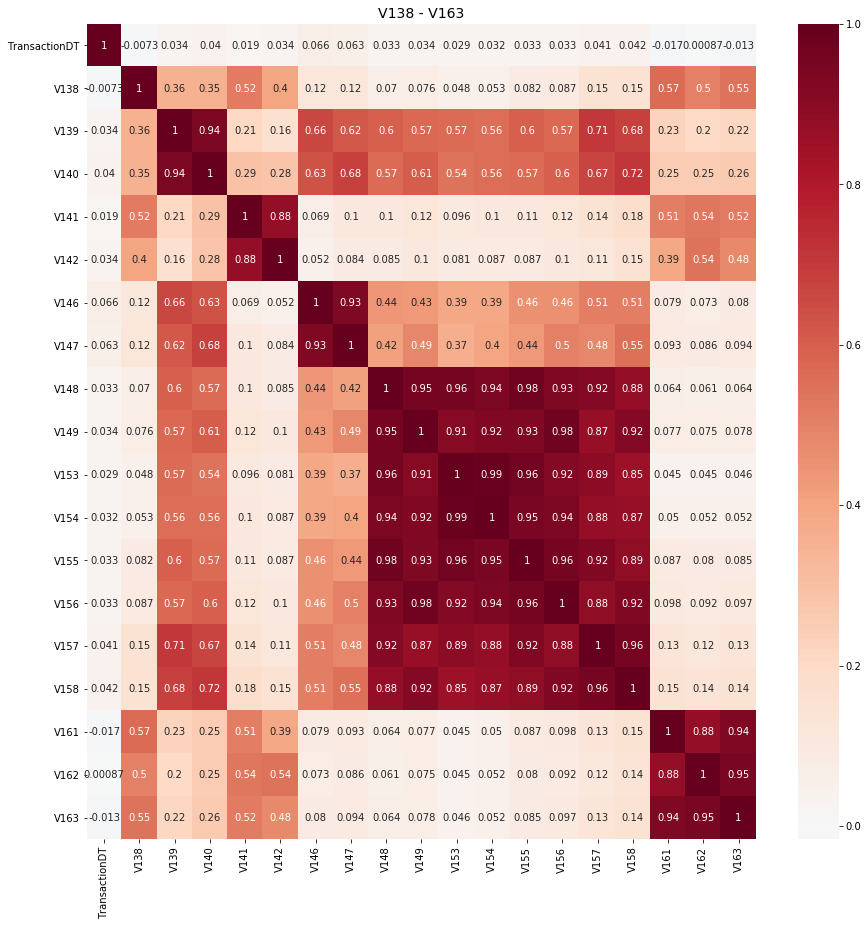

In [20]:
Vs = nans_groups[381539]
make_plots(Vs)
make_corr(Vs)

In [21]:
grps = [[138],[139,140],[141,142],[146,147],[148,149,153,154,156,157,158],[161,162,163]]
v7 = reduce_group(grps)
remove_v.extend(v7)

Use these [138, 139, 142, 147, 156, 162]


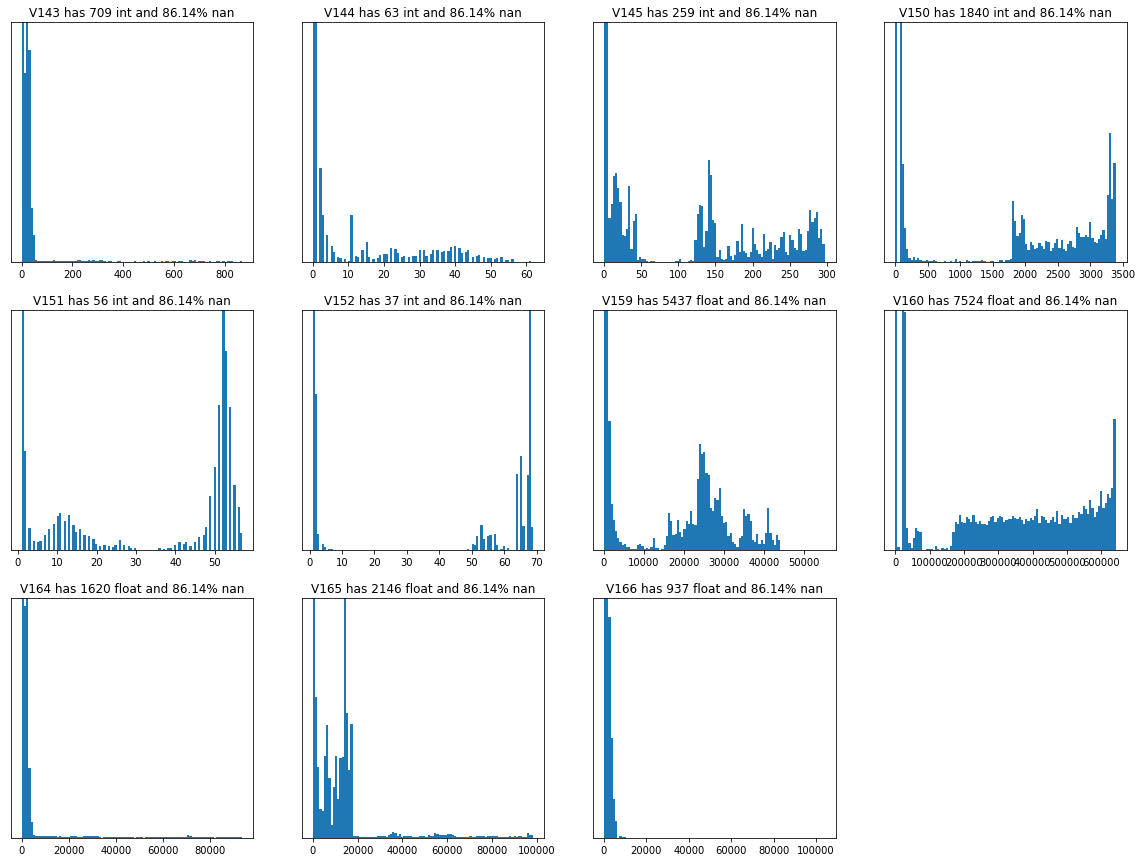

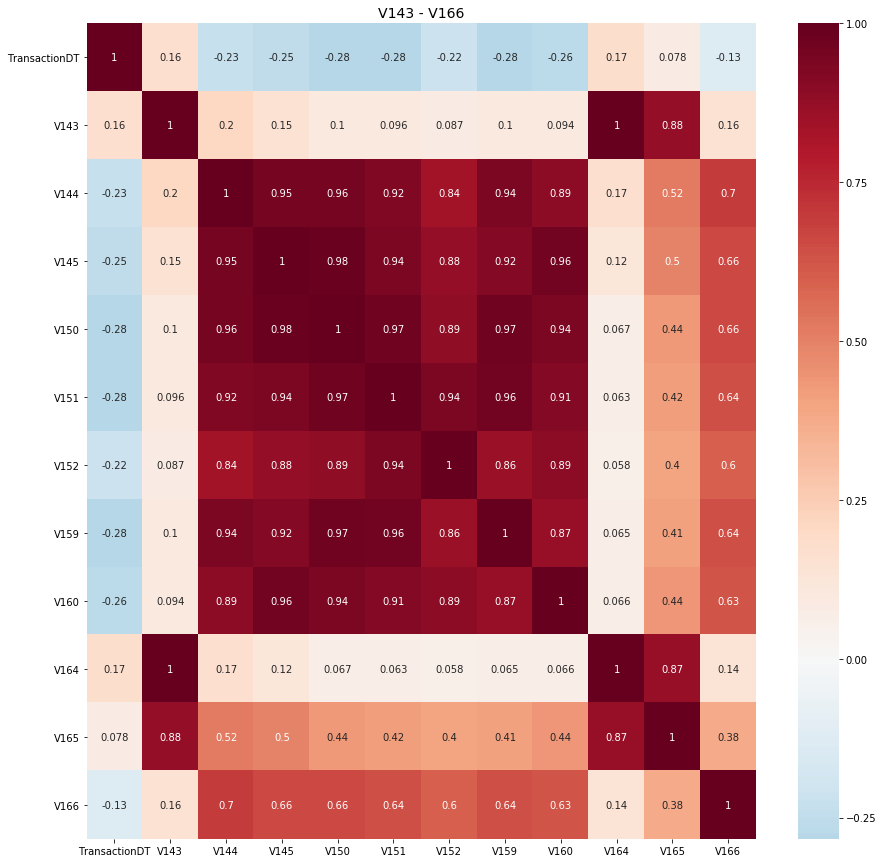

In [22]:
Vs = nans_groups[381533]
make_plots(Vs)
make_corr(Vs)

In [23]:
grps = [[143,164,165],[144,145,150,151,152,159,160],[166]]
v8 = reduce_group(grps)
remove_v.extend(v8)

Use these [165, 160, 166]


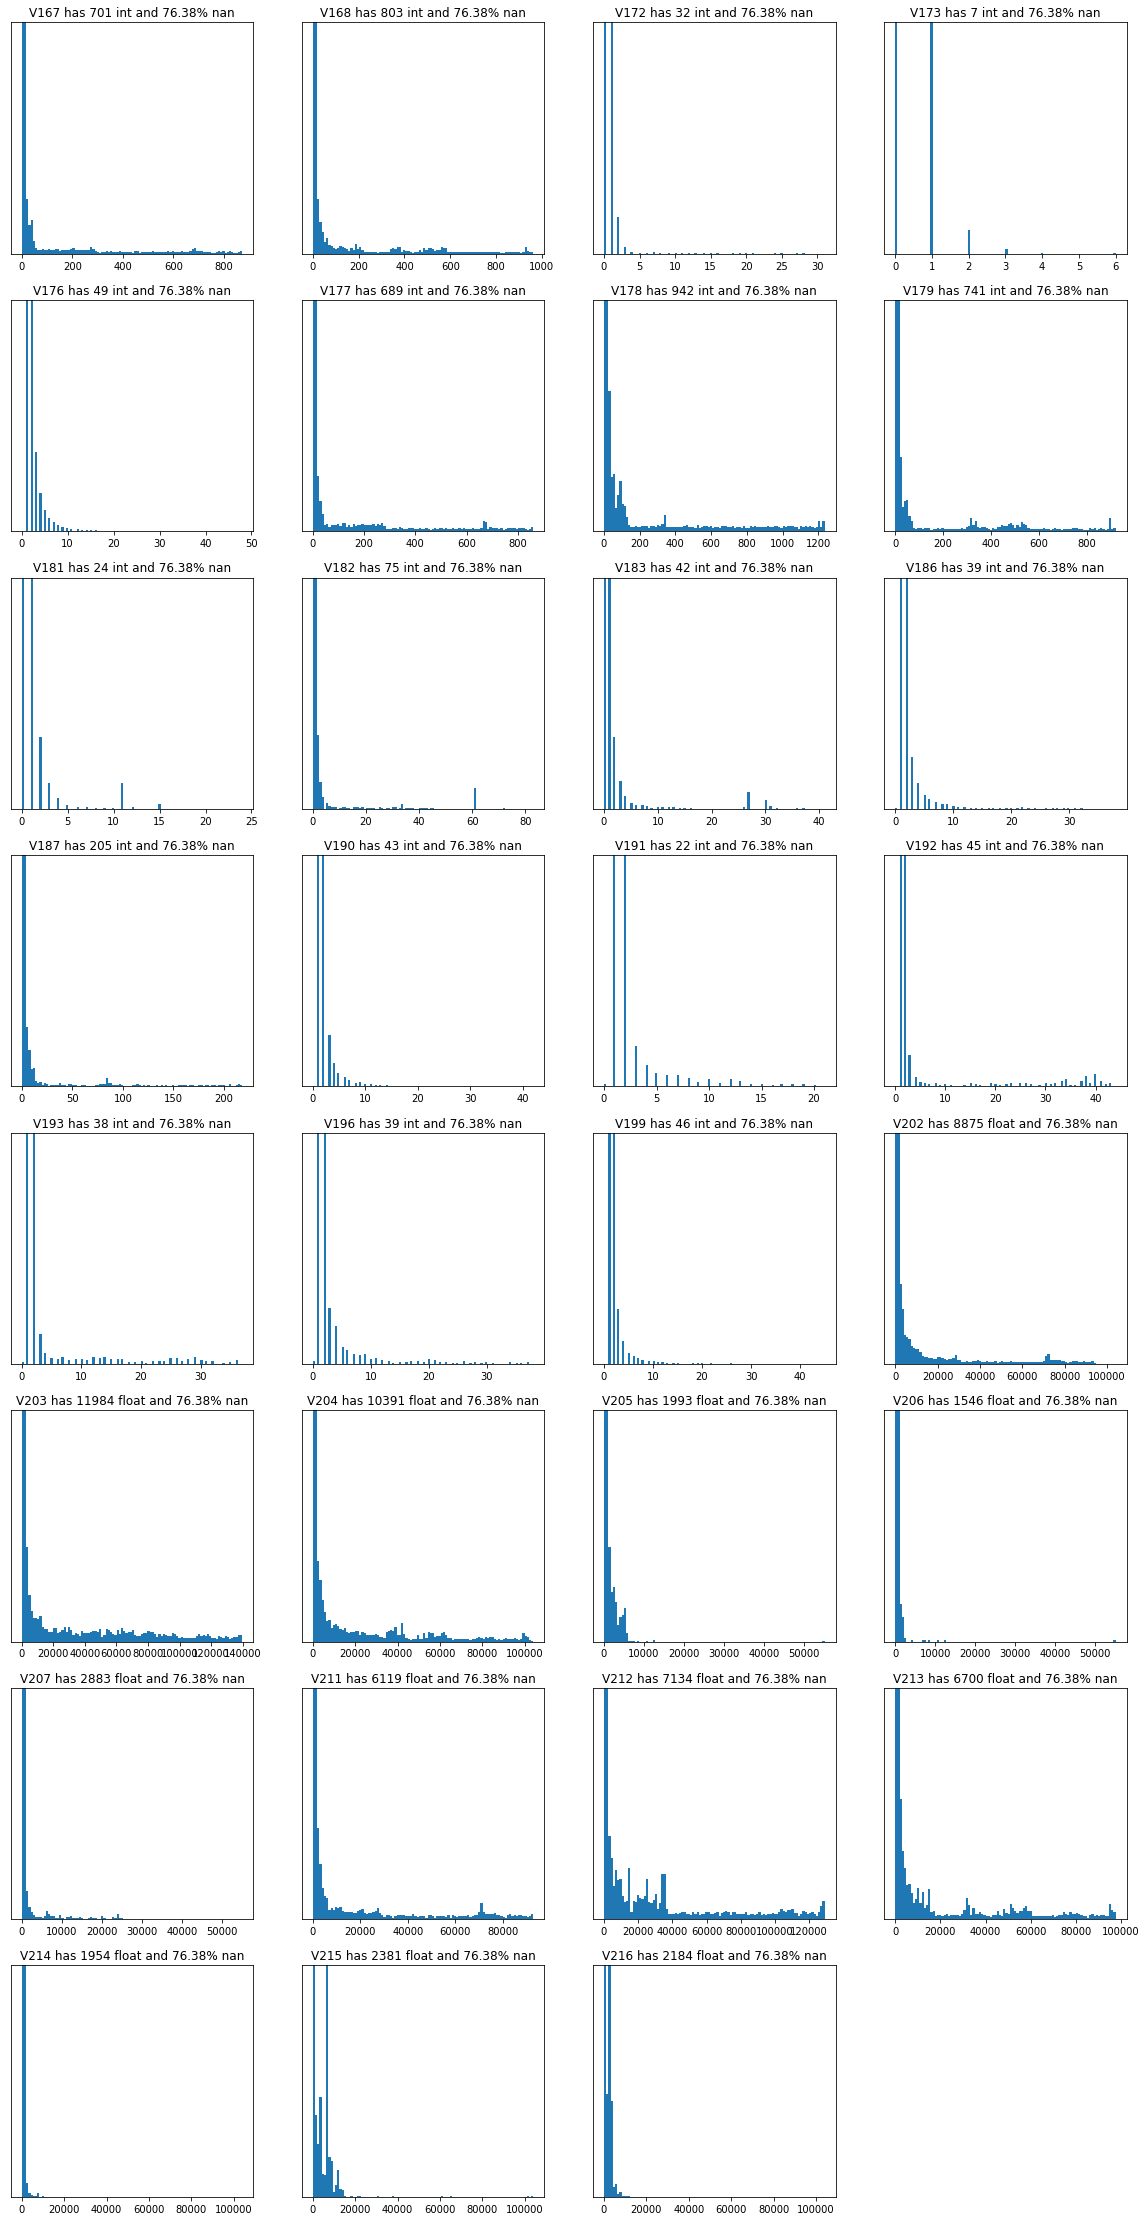

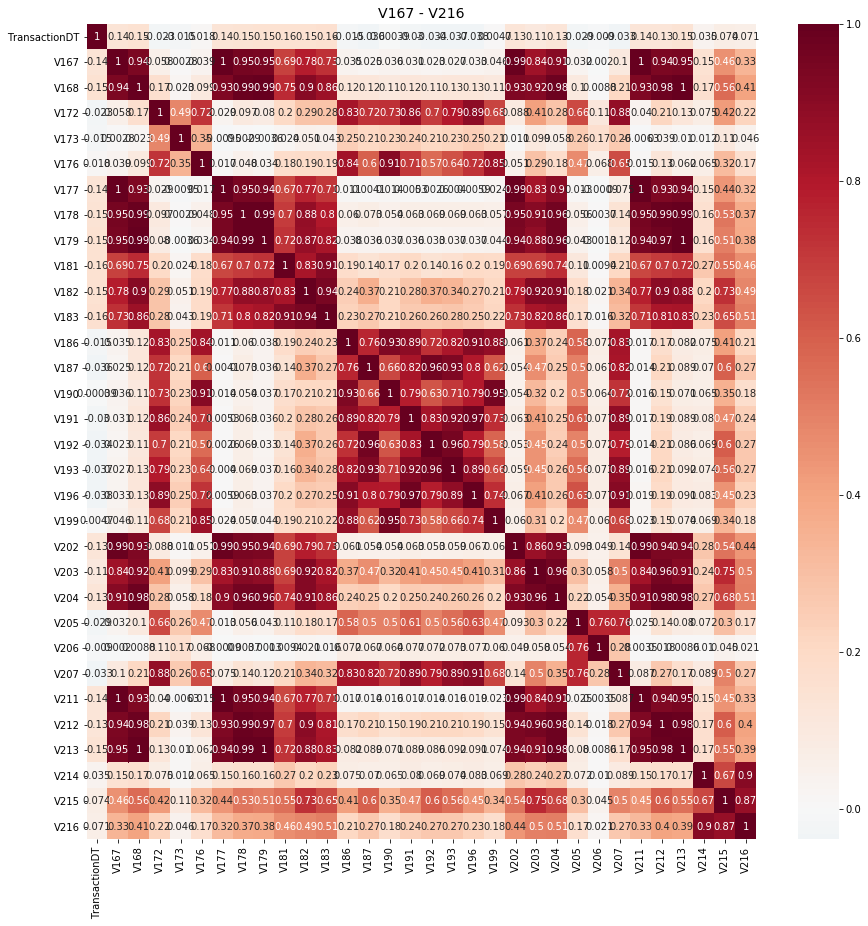

In [24]:
Vs = nans_groups[338273]
make_plots(Vs)
make_corr(Vs)

In [25]:
grps = [[167,168,177,178,179],[172,176],[173],[181,182,183], [186,187,190,191,192,193,196,199],[202,203,204,211,212,213],[205,206],[207],[214,215,216], [169],[170,171,200,201],[174,175],[180],[184,185],[188,189],[194,195,197,198],[208,210],[209]]
v9 = reduce_group(grps)
remove_v.extend(v9)


Use these [178, 176, 173, 182, 187, 203, 205, 207, 215, 169, 171, 175, 180, 185, 188, 198, 210, 209]


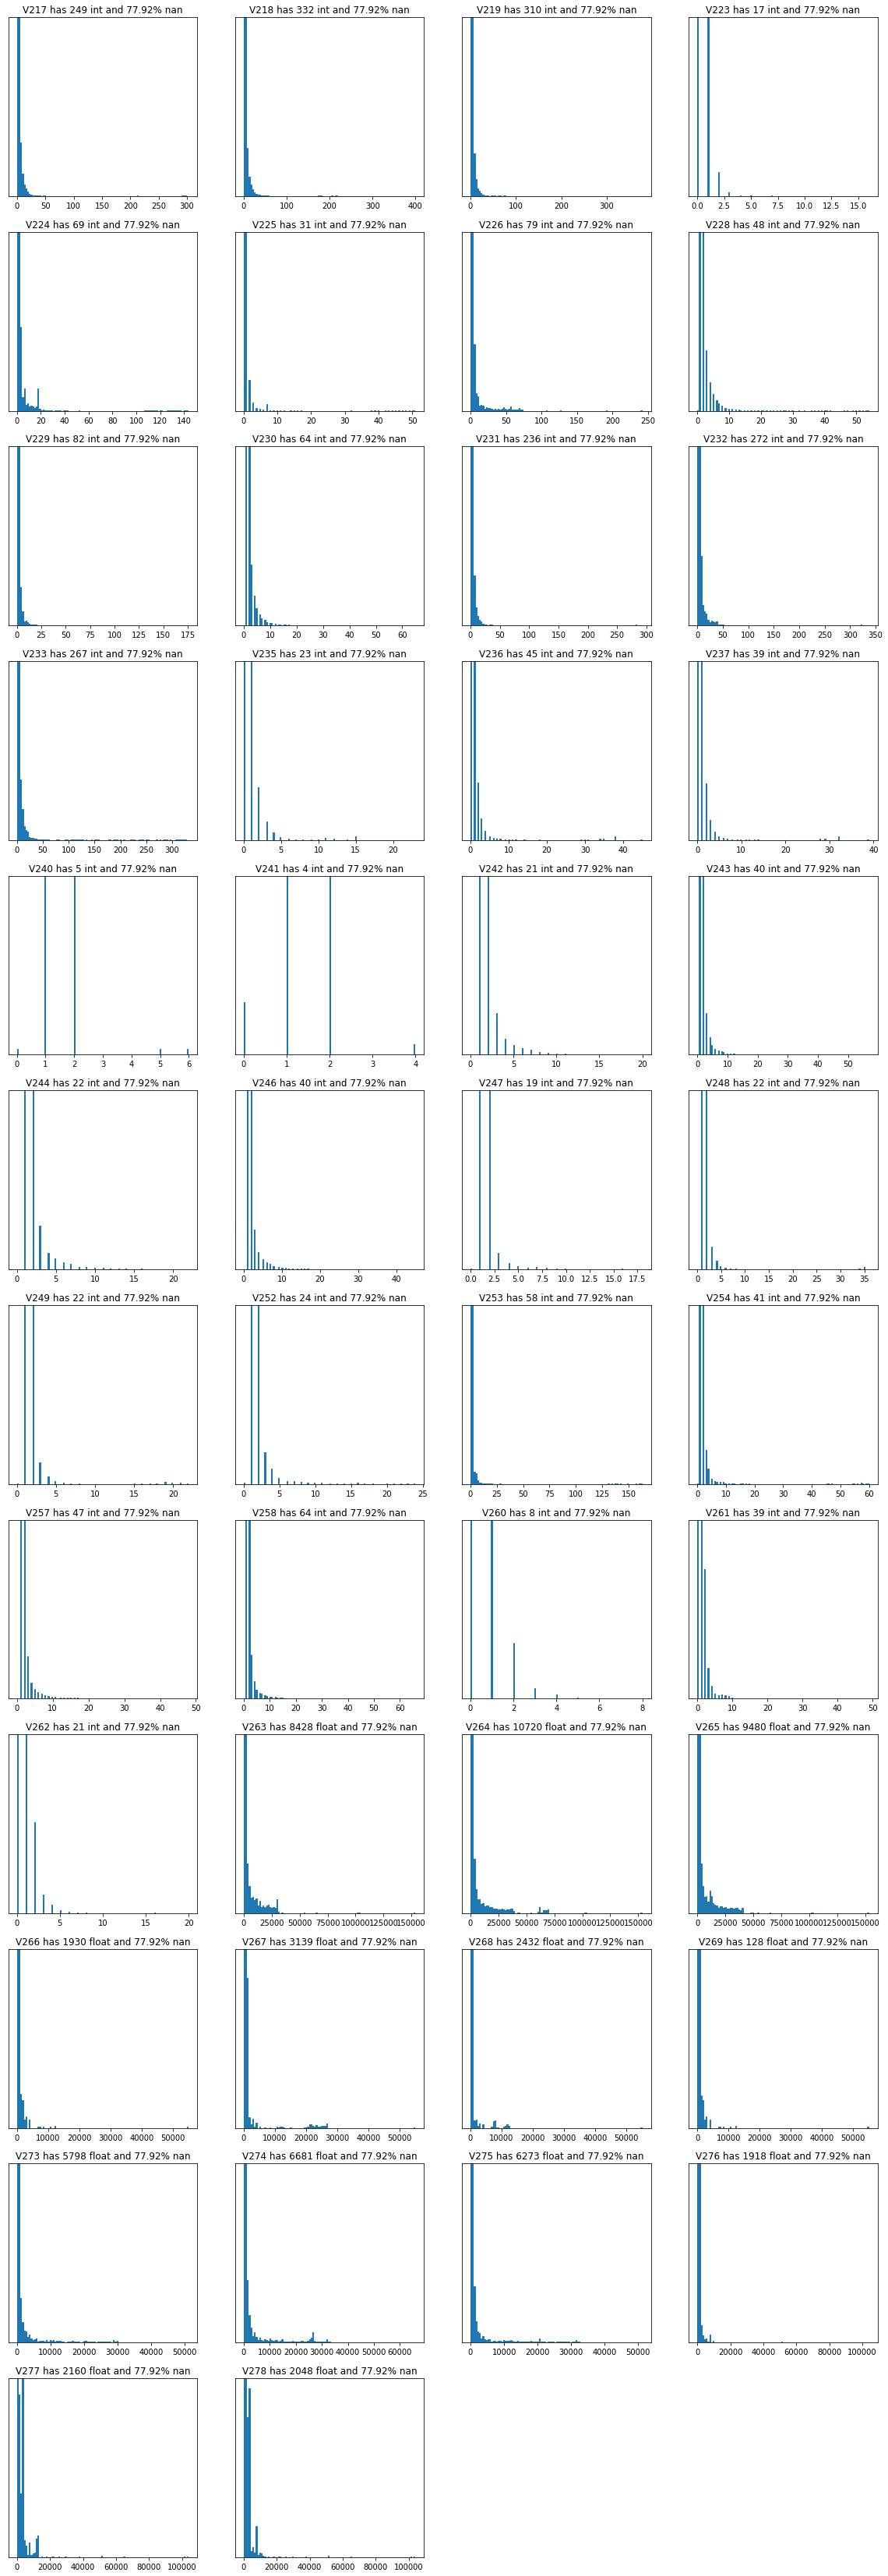

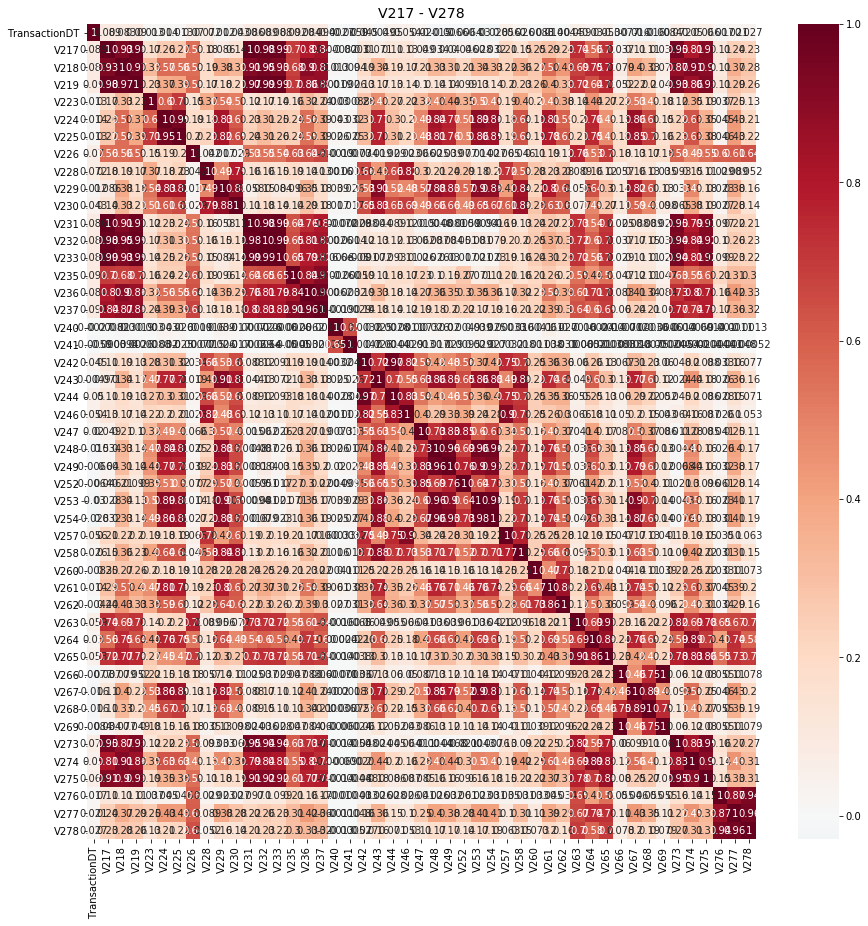

In [26]:
Vs = nans_groups[345113]
make_plots(Vs)
make_corr(Vs)

In [27]:
grps = [[217,218,219,231,232,233,236,237],[223],[224,225],[226],[228],[229,230],[235], [240,241],[242,243,244,258],[246,257],[247,248,249,253,254],[252],[260],[261,262], [263,265,264],[266,269],[267,268],[273,274,275],[276,277,278]]
v10 = reduce_group(grps)
remove_v.extend(v10)



Use these [218, 223, 224, 226, 228, 229, 235, 240, 258, 257, 253, 252, 260, 261, 264, 266, 267, 274, 277]


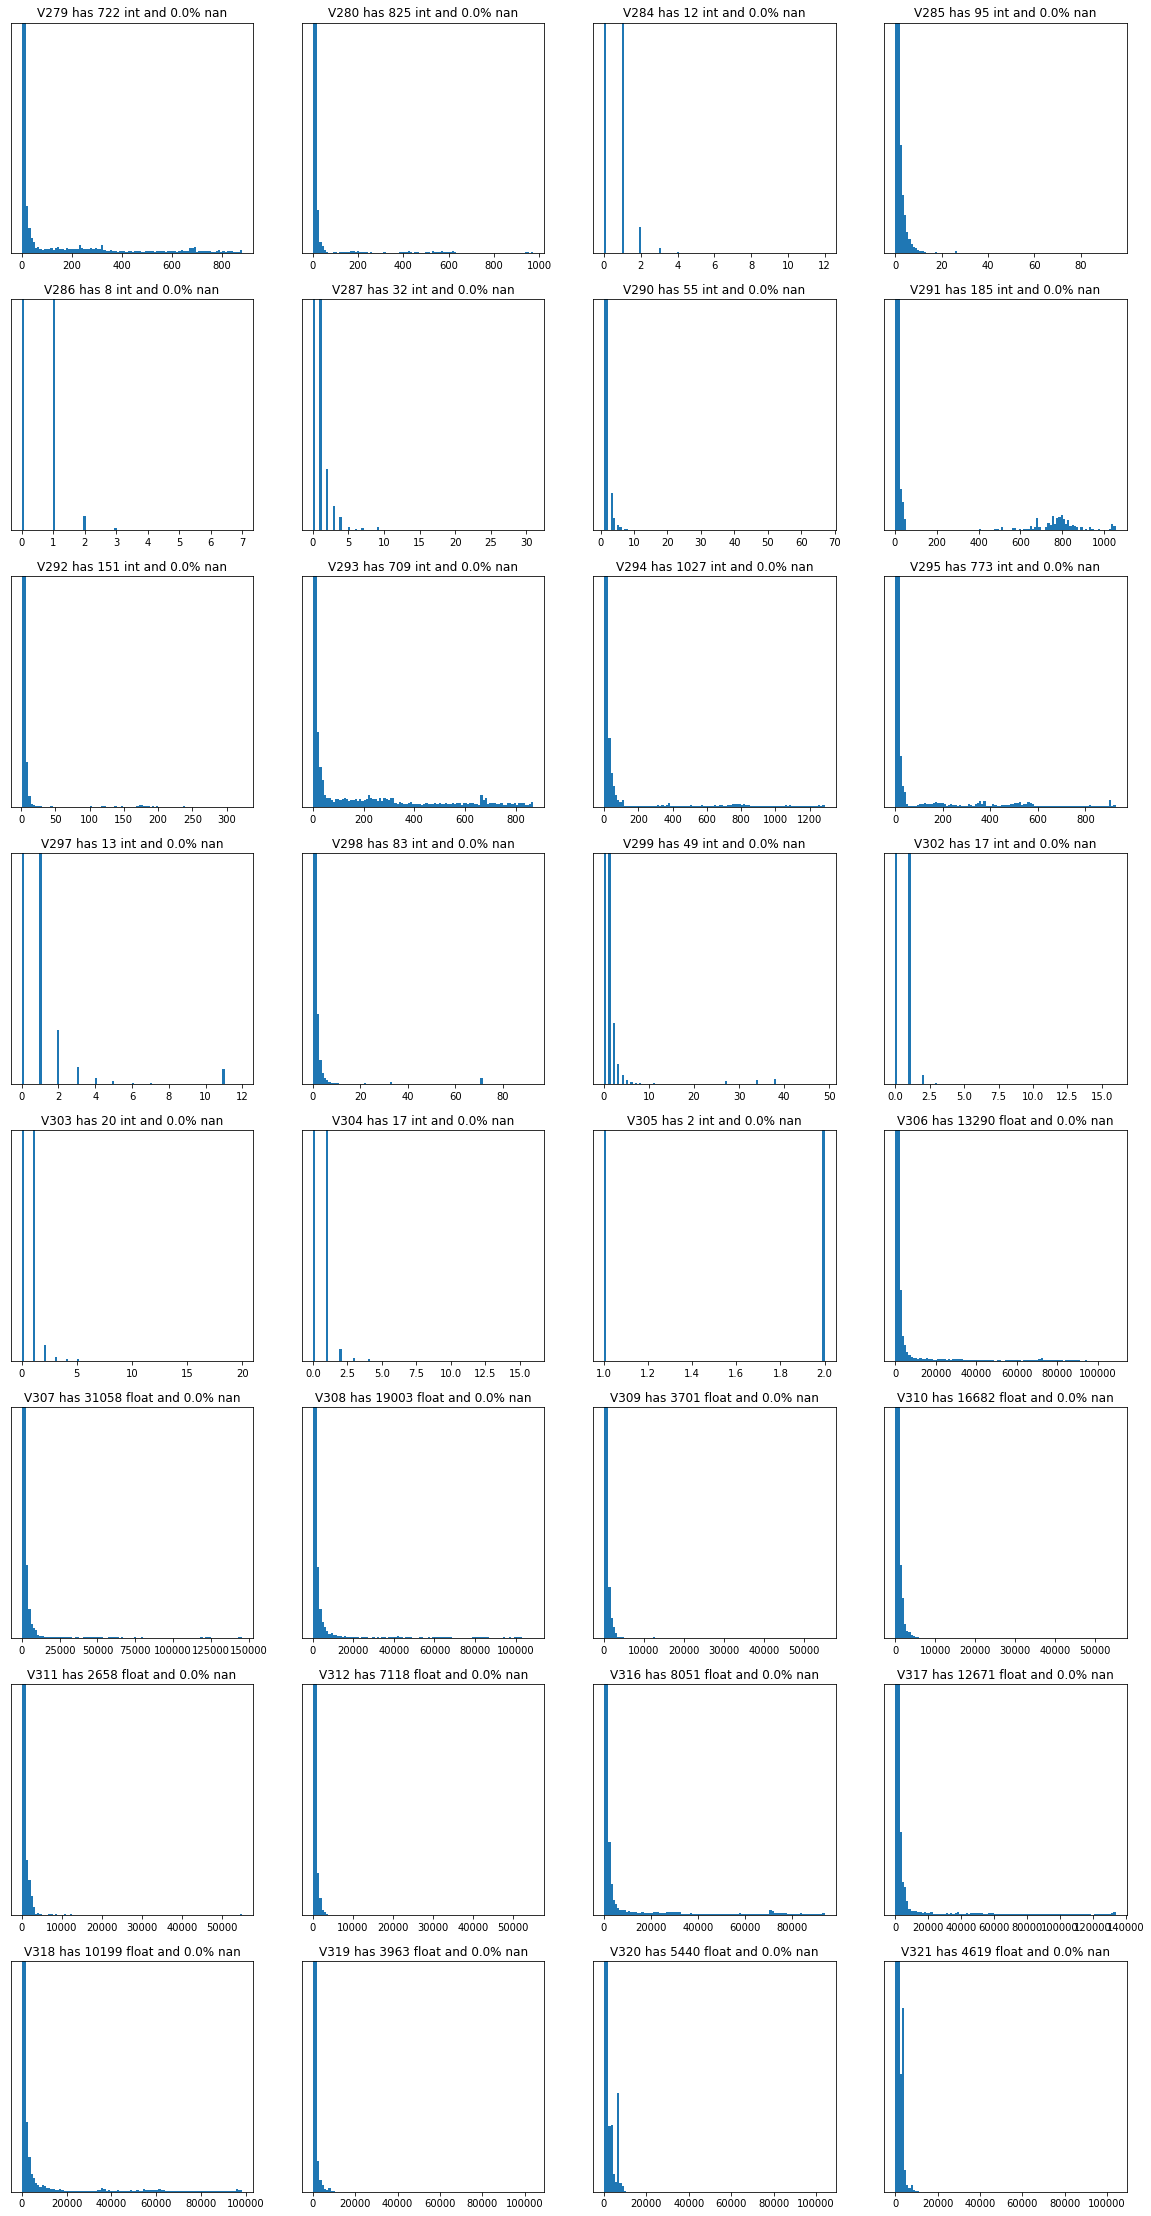

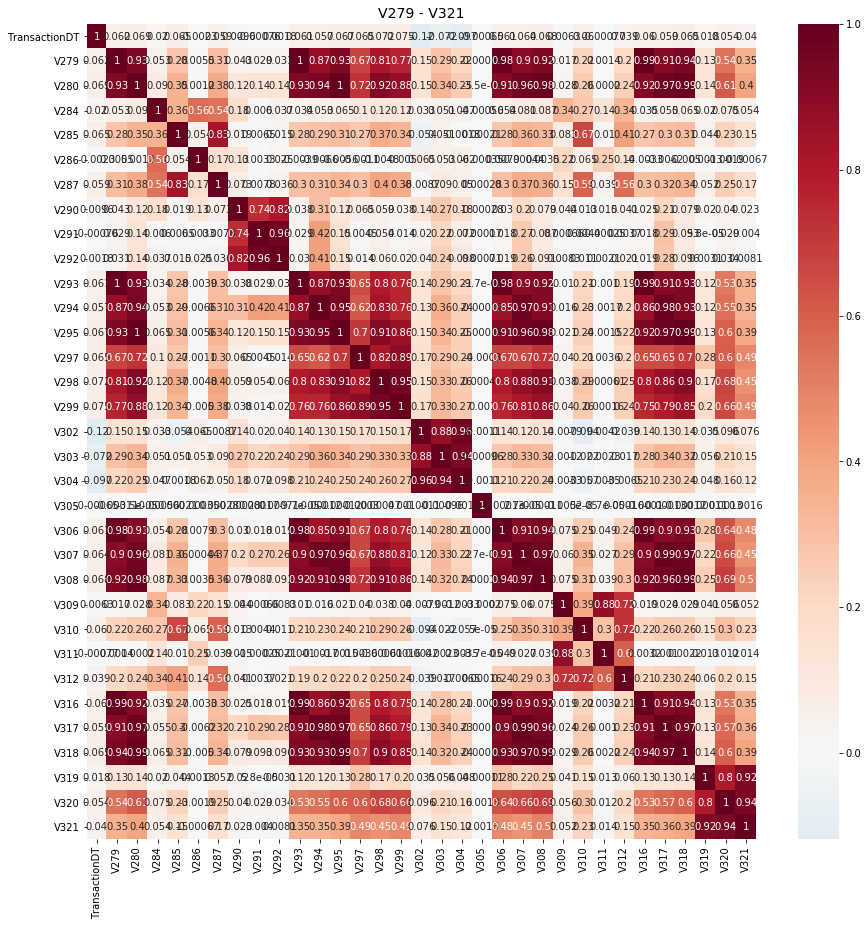

In [28]:
Vs = nans_groups[11]
make_plots(Vs)
make_corr(Vs)

In [29]:
grps = [[279,280,293,294,295,298,299],[284],[285,287],[286],[290,291,292],[297],[302,303,304],[305],[306,307,308,316,317,318],[309,311],[310,312],[319,320,321]]
v11 = reduce_group(grps)
remove_v.extend(v11)


Use these [294, 284, 285, 286, 291, 297, 303, 305, 307, 309, 310, 320]


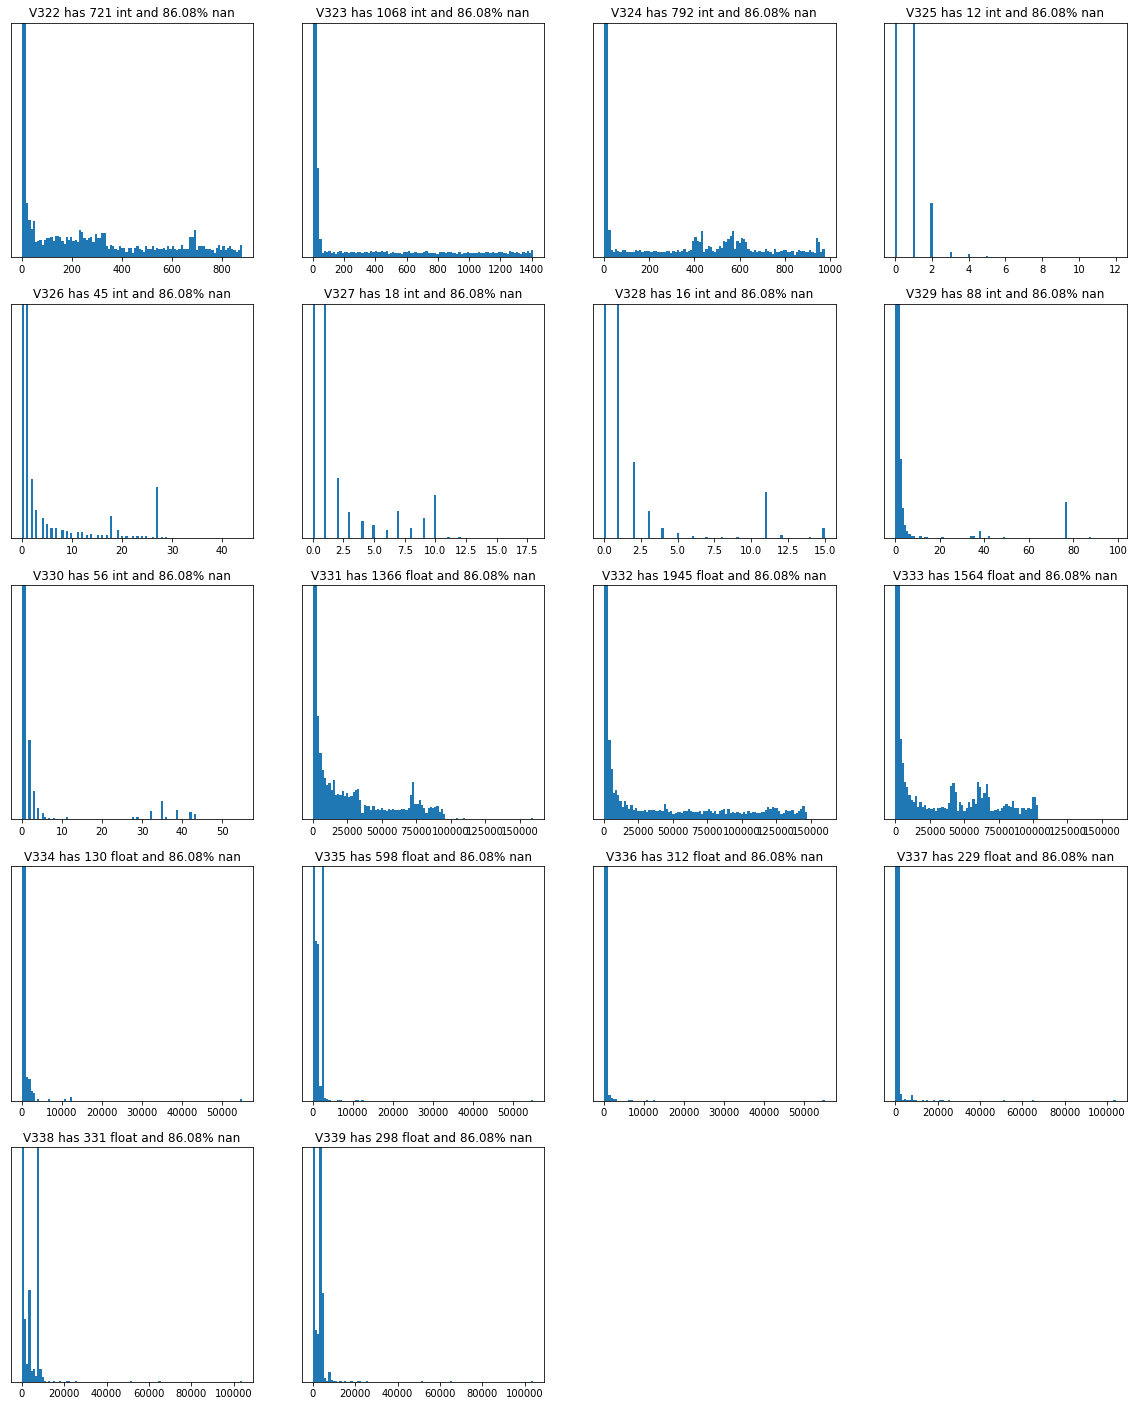

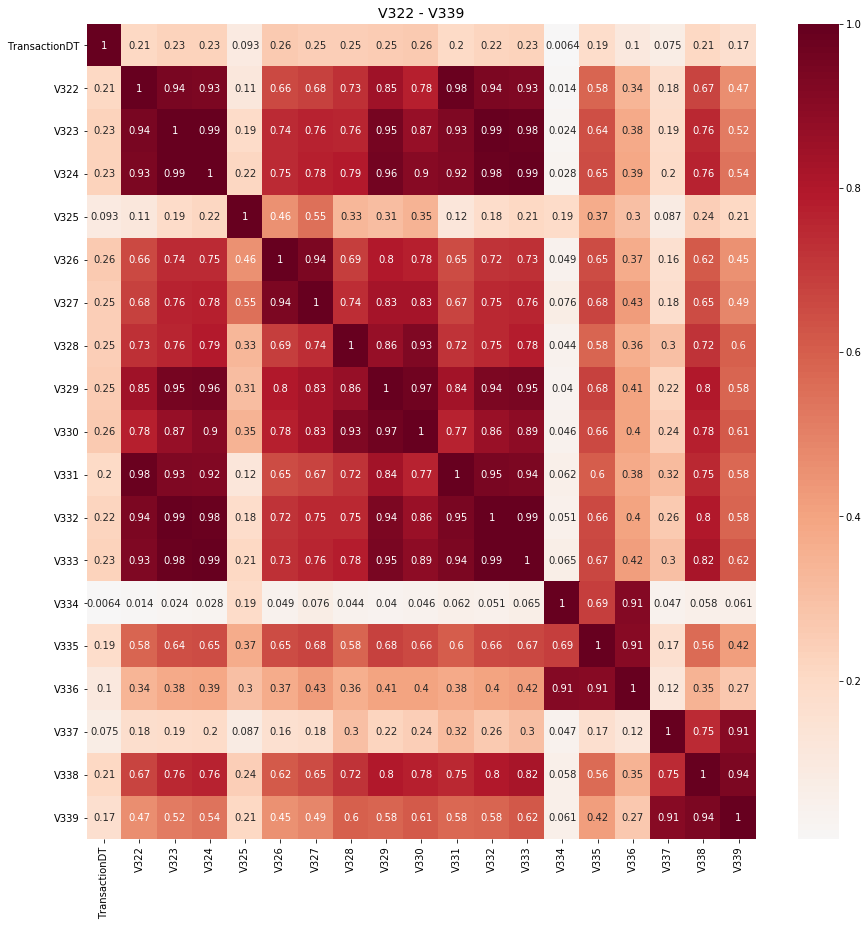

In [30]:
Vs = nans_groups[381241]
make_plots(Vs)
make_corr(Vs)

In [31]:
grps = [[281],[282,283],[288,289],[296],[300,301],[313,314,315], [322,323,324,326,327,328,329,330,331,332,333],[325],[334,335,336],[337,338,339]]
v12 = reduce_group(grps)
remove_v.extend(v12)


Use these [281, 283, 289, 296, 301, 314, 332, 325, 335, 338]


In [32]:
remove_v = list(set(remove_v))

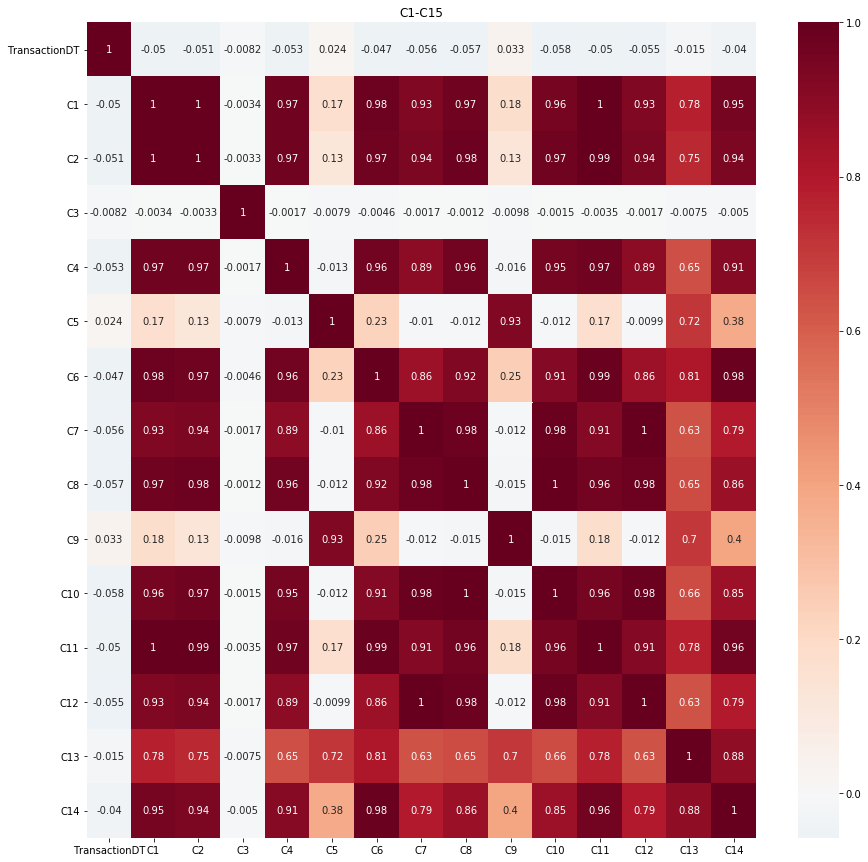

In [33]:
cols = ['TransactionDT'] + ['C'+str(x) for x in range(1,15)]
plt.figure(figsize=(15,15))
sns.heatmap(X_train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('C1-C15')
plt.show()

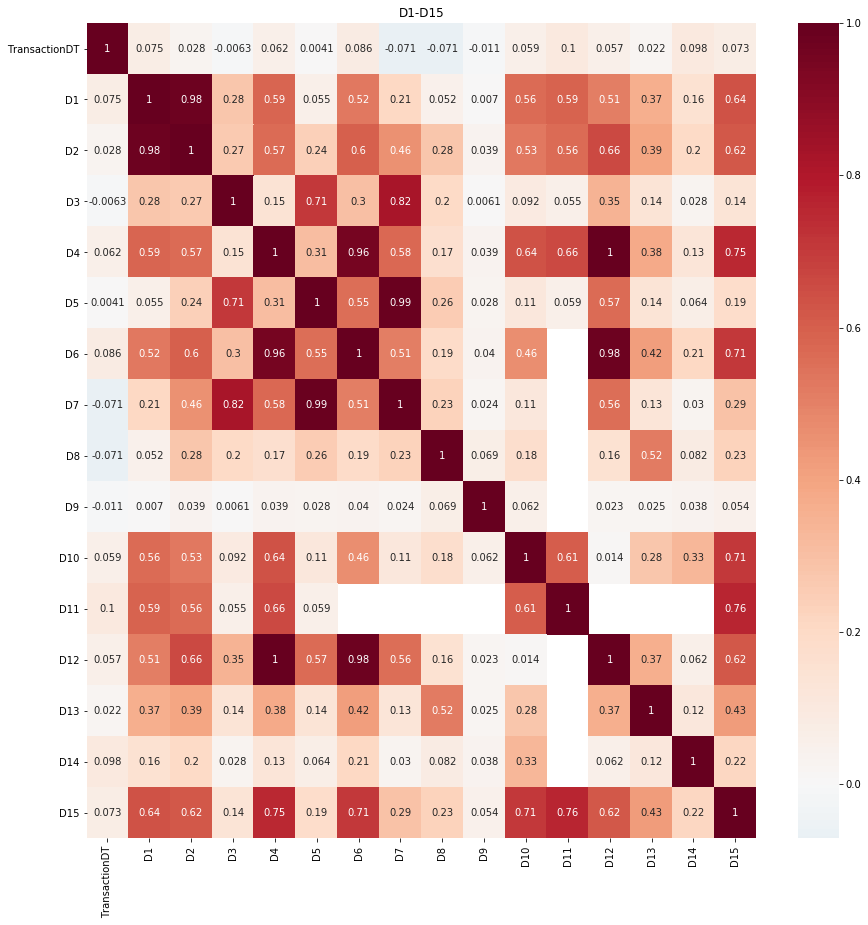

In [34]:
cols = ['TransactionDT'] + ['D'+str(x) for x in range(1,16)]
plt.figure(figsize=(15,15))
sns.heatmap(X_train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('D1-D15')
plt.show()

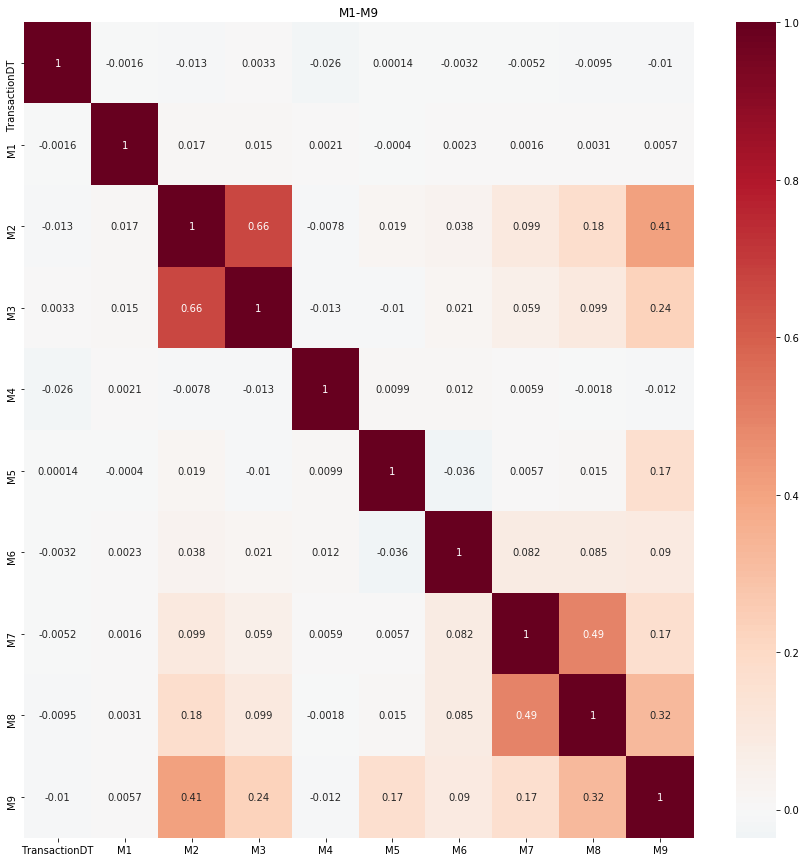

In [35]:
Ms = ['M'+str(x) for x in range(1,10)]
mp = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
for c in Ms: X_train[c] = X_train[c].map(mp)
    
cols = ['TransactionDT'] + Ms
plt.figure(figsize=(15,15))
sns.heatmap(X_train[cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('M1-M9')
plt.show()

In [36]:
Ms = ['M'+str(x) for x in range(1,10)]
mp = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
for c in Ms: X_test[c] = X_test[c].map(mp)

In [37]:
for i in range(len(remove_v)):
    remove_v[i] = "V" + str(remove_v[i])

In [194]:
cols = list( X_train.columns )
cols.remove('TransactionDT')

for c in remove_v:
    cols.remove(c)

for c in ['D6','D7','D8','D9','D12','D13','D14']:
    cols.remove(c)
    
for c in ['C3','M5','id_08','id_33']:
    cols.remove(c)
for c in ['card4','id_07','id_14','id_21','id_30','id_32','id_34']:
    cols.remove(c)
for c in ['id_'+str(x) for x in range(22,28)]:
    cols.remove(c)

In [195]:
print('NOW USING THE FOLLOWING',len(cols),'FEATURES.')
np.array(cols)

NOW USING THE FOLLOWING 234 FEATURES.


array(['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card5',
       'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
       'D10', 'D11', 'D15', 'M1', 'M2', 'M3', 'M4', 'M6', 'M7', 'M8',
       'M9', 'V1', 'V2', 'V4', 'V6', 'V8', 'V11', 'V13', 'V14', 'V17',
       'V20', 'V23', 'V26', 'V27', 'V30', 'V36', 'V38', 'V39', 'V41',
       'V44', 'V47', 'V48', 'V54', 'V56', 'V59', 'V62', 'V65', 'V67',
       'V68', 'V70', 'V76', 'V78', 'V80', 'V82', 'V86', 'V88', 'V89',
       'V91', 'V96', 'V98', 'V99', 'V104', 'V107', 'V108', 'V111', 'V115',
       'V117', 'V120', 'V121', 'V123', 'V124', 'V127', 'V129', 'V130',
       'V136', 'V138', 'V139', 'V142', 'V147', 'V155', 'V156', 'V160',
       'V162', 'V165', 'V166', 'V169', 'V171', 'V173', 'V175', 'V176',
       'V178', 'V180', 'V182', 'V185', 'V187', 'V188', 'V198', 'V203',
   